# Olympics Data (1896-2016) Exploration
## By Shuaib Ahmed

## Introductory Preliminary Wrangling

> basic biographical data on athletes competing in the modern Olympic Games, illustrating medal results from all the games between Athens 1896 to Rio 2016.
* The data was scraped from [sport-reference](https://www.sports-reference.com) by the user **rgriffin**, which is made available on [kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).
* **N.B:** the Winter and Summer Games were held in the same year up until 1992. After that, they were ***staggered*** such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.

## Table of Contents
[Data cleaning and wrangling](#first-head)
* [Assessment](#first-bullet)
    * [Summary - issues](#second-bullet)
* [Cleaning](#third-bullet)
* [Storing Cleaned Data](#fourth-bullet)

[Structure of Dataset](#second-head)

[Univariate Exploration](#third-head)

[Bivariate Exploration](#fourth-head)

[Multivariate Exploration](#fifth-head)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Use os and glob to locate files
import os 
import glob 

In [3]:
try:
    path= 'Olympics-dataset/'
    os.chdir(path)
except FileNotFoundError:
    print('file found already, check current directory')
    pass

In [4]:
# Check 
os.getcwd()

'/Users/ShuaibAhmed/Desktop/DAND-projects /Data-viz-olympics-project/Olympics-dataset'

In [5]:
# Locate all files (csv)
path = 'csv'
glob.glob(f'*.{path}')[0:2]

['athlete_events.csv', 'noc_regions.csv']

## Data cleaning and wrangling  <a class="anchor" id="first-head"></a>

## Assessment <a class="anchor" id="first-bullet"></a>

In [8]:
df_1 = pd.read_csv('athlete_events.csv')
# remove the 'notes column' for now
df_2 = pd.read_csv('noc_regions.csv',\
                   usecols= ['NOC', 'region']) 

In [9]:
df_1.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Detecting missing values in the **first table**.

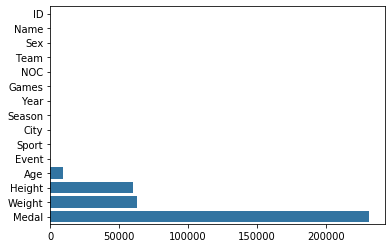

In [10]:
# Counting columns with null values contained within dataframe
na_counts = df_1.isna().sum().sort_values()

# Plotting the null value counts 
base_color = sns.color_palette()[0] # All bars are blue
sns.barplot(na_counts, na_counts.index.values, color = base_color);

* <font color='RED'> null values are present in the columns:
    * **Age**
    * **Height**
    * **Weight**
    * **Medal**

**Justifications**:

   1. **Age** - some people's ages were undisclosed, so input `'None'`.
   2. **Height and Weight** - for some older versions of the Olympics, there may have not been sophisticated tools to measure such human metrics, so we can replace these values with `'None'`.
   3. **Medal** - athletes participated, but some did not make it through to the qualification rounds to earn a medal that is required once they finish in the top 3 (Bronze, Silver, Gold). 
        * Hence, change NAN to `'None'`.


In [16]:
# No negative/zero values for numeric variables - Age/Height/Weight
df_1.query(('Age <= 0') and ('Height <= 0') and ('Weight <= 0'))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [17]:
# list of summer host cities
df_1.query("Season == 'Summer'")['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

* <font color='Red'> Some mispelled summer host city names: Antwerpen (Antwerp), Athina (Athens), Moskva (Moscow) </font>

In [18]:
# list of winter host cities
df_1.query("Season == 'Winter'")['City'].unique()

array(['Calgary', 'Albertville', 'Lillehammer', 'Salt Lake City',
       'Lake Placid', 'Sochi', 'Nagano', 'Torino', 'Squaw Valley',
       'Innsbruck', 'Sarajevo', 'Oslo', "Cortina d'Ampezzo", 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

* <font color='Red'> Some mispelled/long names (when possible) Winter host city names: Cortina d'Ampezzo (Cortina), Sankt Moritz (St. Moritz) </font>

In [19]:
df_1.Medal.unique().tolist() # Medals earned should also be 
# ordered from Bronze, Silver, Gold

[nan, 'Gold', 'Bronze', 'Silver']

In [20]:
df_1.Sex.unique().tolist() # Sex should also be spelled out 
# in full M: Male and F: Female

['M', 'F']

***
Now, we are going to check the datatypes, info and contents

In [21]:
df_1.shape

(271116, 15)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


* <font color='Red'> **ID** is incorrectly classed as an integer, contains a unique identifier `string` </font>
* <font color='Red'> **Sex** is incorrectly classed as an object/string, contains binary `categories` (Male/Female) </font>
* <font color='Red'> **Season** is incorrectly classed as an integer, contains binary `categories` (Winter/Summer)
* <font color='Red'> **Medal** iscorrectly classed as an object/string, contains finite grouped 'categories' (Bronze, Silver, Gold)

**First table**
* This is going to be the main data for collecting insights about the Olympics (1896-2016).

In [23]:
df_2.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


**Second Table**
* **NOC** is the primary key used to join the two tables
* <font color='Red'> Tables **df_1** and **df_2** share common observational units **(region)**, but are separated into two different tables </font>

*** 
## Summary <a class="anchor" id="second-bullet"></a>

**Data tidiness issues**

***Completeness***
* <font color='RED'> Null values are present in the columns:
    * **Age**
    * **Height**
    * **Weight**
    * **Medal**
        
***Accuracy***
* <font color='Red'> Some mispelled summer host city names: Antwerpen (Antwerp), Athina (Athens), Moskva (Moscow) </font>
* <font color='Red'> Some mispelled/long names (when possible) Winter host city names: Cortina d'Ampezzo (Cortina), Sankt Moritz (St. Moritz) </font>

***Consistency***
* <font color='Red'> **ID** is incorrectly classed as an integer, contains a unique identifier `string` </font>
* <font color='Red'> **Sex** is incorrectly classed as an object/string, contains binary `categories` (Male/Female) </font>
* <font color='Red'> **Season** is incorrectly classed as an integer, contains binary `categories` (Winter/Summer)
* <font color='Red'> **Medal** is incorrectly classed as an object/string, contains finite grouped `categories` (Bronze, Silver, Gold)
* **Sex** column has M and F instead of Male and Female

***Tidiness*** 
* <font color='Red'> Tables **df_1** and **df_2** share common observational units **(region)**, but are separated into two different tables </font>

In [30]:
df_2.head(20)

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
5,ANG,Angola
6,ANT,Antigua
7,ANZ,Australia
8,ARG,Argentina
9,ARM,Armenia


## Cleaning <a class="anchor" id="third-bullet"></a>

In [31]:
# Creating a copy as to keep old tables before any changes, 
# while not overwriting the old tables as cleaning is performed.

olympic_clean = df_1.copy()
region_clean = df_2.copy()

## Completeness

* <font color='RED'> null values are present in the columns:
    * **Age**
    * **Height**
    * **Weight**
    * **Medal**

***Define***

For null values in the above columns, fill those in with `'None'` using `fillna`.

***Code***

In [32]:
# Handling the missing values - NANs become 'None' to represent unclassified Olympian attributes

olympic_clean['Age'].fillna(value=0, inplace=True)
olympic_clean['Height'].fillna(value=0, inplace=True)
olympic_clean['Weight'].fillna(value=0, inplace=True)
olympic_clean['Medal'].fillna(value='None', inplace=True)

***Test***

In [33]:
# Check table null value counts

In [34]:
olympic_clean.isna().sum().sum()

0

In [35]:
assert olympic_clean.Age.isin([0]).any()
assert olympic_clean.Height.isin([0]).any()
assert olympic_clean.Weight.isin([0]).any()

In [36]:
string = ['None'] # locating the value to assert the our filled in values are swapped with 'None'
value = [0] # locating 0 as a distinct object that represents 'None', preserving the numeric data type
assert olympic_clean.Age.isin([0]).any()
assert olympic_clean.Height.isin([0]).any()
assert olympic_clean.Weight.isin([0]).any()
assert olympic_clean['Medal'].str.contains(string, regex=False).all()

## Accuracy

* <font color='Red'> Some mispelled summer host city names: Antwerpen (Antwerp), Athina (Athens), Moskva (Moscow) </font>
* <font color='Red'> Some mispelled/long names (when possible) Winter host city names: Cortina d'Ampezzo (Cortina), Sankt Moritz (St. Moritz) </font>

***Define***

For mispelled host cities in each edition, replace with correct version using `replace`.

***Code***

In [37]:
olympic_clean['City'].replace(['Antwerpen', 'Athina', 'Moskva',"Cortina d'Ampezzo",'Sankt Moritz'],\
                              ['Athens', 'Antwerp','Moscow', 'Cortina', 'St. Moritz'], inplace= True)

***Test***

In [38]:
# Each host cities corrected name in place
olympic_clean.City.unique()

array(['Barcelona', 'London', 'Athens', 'Paris', 'Calgary', 'Albertville',
       'Lillehammer', 'Los Angeles', 'Salt Lake City', 'Helsinki',
       'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm', 'Sochi', 'Nagano',
       'Torino', 'Beijing', 'Rio de Janeiro', 'Antwerp', 'Squaw Valley',
       'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Oslo', 'Cortina', 'Melbourne', 'Roma', 'Amsterdam',
       'Montreal', 'Moscow', 'Tokyo', 'Vancouver', 'Grenoble', 'Sapporo',
       'Chamonix', 'St. Louis', 'St. Moritz', 'Garmisch-Partenkirchen'],
      dtype=object)

In [39]:
olympic_clean.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None


## Consistency

* <font color='Red'> **ID** is incorrectly classed as an integer, contains a unique identifier `string` </font>
* <font color='Red'> **Sex** is incorrectly classed as an object/string, contains binary `categories` (Male/Female) </font>
* <font color='Red'> **Season** is incorrectly classed as an integer, contains binary `categories` (Winter/Summer)
* <font color='Red'> **Medal** is incorrectly classed as an object/string, contains finite grouped `categories` (Bronze, Silver, Gold)

***Define***

Change the column objects specified above to its correct data type via `astype`.

***Code***

In [40]:
#olympic_clean.columns

In [41]:
olympic_clean['ID'] = olympic_clean.ID.astype('object')
olympic_clean['Sex'] = olympic_clean.Sex.astype('category')
#olympic_clean['Year'] = olympic_clean.Year.astype('datetime64[ns]')
olympic_clean['Season'] = olympic_clean.Season.astype('category')

In [42]:
# Medal is an ordinal (variable) category, we have to do a bit more work to adjust it to the correct order

order = ['None', 'Bronze', 'Silver', 'Gold'] # From lowest-highest
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = order)
olympic_clean['Medal'] = olympic_clean.Medal.astype(ordered_cat)

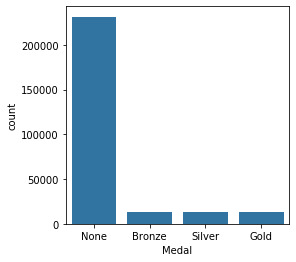

In [43]:
# Check that its retains this inherent order
plt.figure(figsize = [4, 4])
sns.countplot(data = olympic_clean, x = 'Medal', color = base_color);

***Test***

In [44]:
assert olympic_clean['ID'].dtypes == 'object'
assert olympic_clean['Sex'].dtypes == 'category'
# assert olympic_clean['Year'].dtypes == 'datetime64[ns]'
assert olympic_clean['Season'].dtypes == 'category'
assert olympic_clean['Medal'].dtypes == 'category'

In [45]:
olympic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null object
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271116 non-null float64
Weight    271116 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null category
dtypes: category(3), float64(3), int64(1), object(8)
memory usage: 25.6+ MB


Doing these data type cleanings (especially to categorical) has lowered the memory usage.

* <font color='Red'> **Sex** column has M and F instead of Male and Female </font>

***Define***

Change M and F to Male and Female respectively via `replace`.

***Code***

In [46]:
olympic_clean['Sex'].replace(['M', 'F'], ['Male','Female'], inplace= True)

***Test***

In [47]:
olympic_clean.Sex.unique()

array(['Male', 'Female'], dtype=object)

In [48]:
olympic_clean['Sex'] = olympic_clean['Sex'].astype('category') # Preserve category dtype

In [49]:
olympic_clean.Sex.unique()

[Male, Female]
Categories (2, object): [Male, Female]

## Tidiness

* <font color='Red'> Tables **df_1** and **df_2** share common observational units **(region)**, but are separated into two different tables </font>

***Define***

We need to join these two table via its **NOC**, which is achievable through `merge` - specifically a **left-join**.

***Code***

In [50]:
olympic_clean = olympic_clean.merge(region_clean, on='NOC', how='left')

In [51]:
olympic_clean.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,Male,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,Male,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Athens,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,Male,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark


Noticeably, the year contents appears in the last 4 characters of contents, concatenated with other needless information (due to to datetime conversion).
* Fix this by changing back to 'str' and obtain only last the 4 characters of each year

## Final cleanings 

Check that the data after joining contains all the required contents

In [56]:
olympic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
ID        271116 non-null object
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271116 non-null float64
Weight    271116 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null category
region    270746 non-null object
dtypes: category(3), float64(3), int64(1), object(9)
memory usage: 29.7+ MB


* Noticeably, there are missing regions that are not accounted for
* **Age**, **Height** and **Weight** should be reverted back to numeric (floating point)

In [57]:
filter_1 = olympic_clean['region'].isnull() # filtering out missing regions after merge
olympic_clean.loc[filter_1][['NOC', 'Team', 'region']].drop_duplicates()

,NOC,Team,region
578,SGP,Singapore,NaN
6267,ROT,Refugee Olympic Athletes,NaN
44376,SGP,June Climene,NaN
61080,UNK,Unknown,NaN
64674,TUV,Tuvalu,NaN
80986,SGP,Rika II,NaN
108582,SGP,Singapore-2,NaN
235895,SGP,Singapore-1,NaN


* There are five different team names for the same NOC (SGP - Singapore)
* Other teams that are quite hidden should also be included

Operation carried out by `np.where()`.

In [58]:
# Update this and add the team to its specified NOC

olympic_clean['region'] = np.where(olympic_clean['NOC']=='SGP', 'Singapore', olympic_clean['region'])
olympic_clean['region'] = np.where(olympic_clean['NOC']=='ROT', 'Refugee Olympic Athletes', olympic_clean['region'])
olympic_clean['region'] = np.where(olympic_clean['NOC']=='UNK', 'Unknown', olympic_clean['region'])
olympic_clean['region'] = np.where(olympic_clean['NOC']=='TUV', 'Tuvalu', olympic_clean['region'])

In [59]:
# Put these values from Country into Team
olympic_clean.drop('Team', axis = 1, inplace = True)
olympic_clean.rename(columns = {'region': 'Team'}, inplace = True)

Finally, put the **Team** column *before* the **NOC** using `df.reindex()`.

In [60]:
list_order = ['ID', 'Name', 'Sex', 'Age', 'Height','Weight','Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport'\
             , 'Event', 'Medal']
olympic_clean = olympic_clean.reindex(list_order, axis=1)

In [61]:
olympic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null object
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271116 non-null float64
Weight    271116 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null category
dtypes: category(3), float64(3), int64(1), object(8)
memory usage: 27.7+ MB


## Storing wrangled data <a class="anchor" id="fourth-bullet"></a>

In [62]:
olympic_clean.to_csv('olympics-master.csv', index=False)

### What is the structure of your dataset? <a class="anchor" id="second-head"></a>

> Rows and columns - 271,116 and 15 respectively
<br>

A mix of: 
* Categorical variables - Nominal (Sex and Season) and Ordinal (Medal)
    > Medal rank - [None*, Bronze, Silver, Gold]
* Numerical variables - Age, Height, Weight and Year (no month/day inputted)
* String variables - ID, Name, Team, NOC, Games, City, Sport and Event

N.B: **Age, Height and Weight** have the most missing values, but are irretrievable and challenging to recover. Hence, I have chosen to input them as **0.0** (placeholder for None) to signify this and will filter out when possible for understanding the distribution of these personal characteristics among athletes.

### What is/are the main feature(s) of interest in your dataset?

> I want to examine how the Olympics has evolved, including participation (counts), personal attributes of Athletes (Age, Height and Weight) and performance (medals attained) between male and female athletes, medalists, nations and different events related to their season.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The number of medals won by a country is a strong indicator of success for athletes when representing their respective nations. Sometimes, there is even a bigger incentive to perform well if a team/country wins the right to host the Olympics during its four-year cycle, which can prove insightful to this investigation. Drilling by Sport can also be useful to discover which events incur higher medal winners/participants. Finding the distribution of age among medal winners can be insightful.

## Univariate Exploration <a class="anchor" id="third-head"></a>

> this section will investigate distributions of individual variables.

In [63]:
# read in master data 
olympics = pd.read_csv('olympics-master.csv')

In [64]:
try:
    path= 'Olympics-dataset/'
    os.chdir(path)
except FileNotFoundError:
    print('file found already, check current directory')
    pass

file found already, check current directory


In [65]:
# Check 
os.getcwd()

'/Users/ShuaibAhmed/Desktop/DAND-projects /Data-viz-olympics-project/Olympics-dataset'

In [66]:
# Correct data types one last time 

olympics['ID'] = olympics.ID.astype('object')
olympics['Sex'] = olympics.Sex.astype('category')
olympics['Season'] = olympics.Season.astype('category')

order = ['None', 'Bronze', 'Silver', 'Gold'] # From lowest-highest
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = order)
olympics['Medal'] = olympics.Medal.astype(ordered_cat)

In [68]:
assert olympics['ID'].dtypes == 'object'
assert olympics['Sex'].dtypes == 'category'
assert olympics['Season'].dtypes == 'category'
assert olympics['Medal'].dtypes == 'category'

I will start by looking at the categorical variables: mainly the proportion of male and female athletes as well as the medal counts.

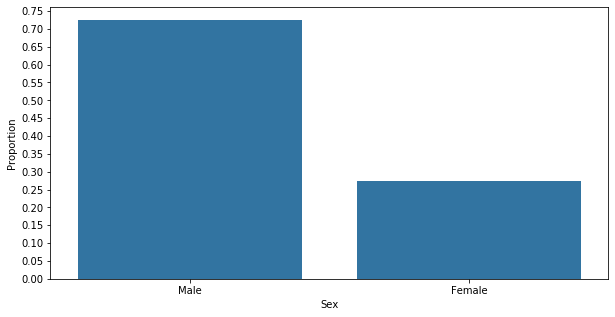

In [71]:
base_color = sns.color_palette()[0] # All bars are blue

plt.figure(figsize = [10, 5]) # Adjust figisize to be larger
# get proportion taken by most common group for derivation
# of tick marks
n_points = olympics.shape[0]
max_count = olympics['Sex'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = [f'{v:0.2f}' for v in tick_props]

# generate plot 1
sns.countplot(data= olympics, x='Sex', color= base_color, order = olympics['Sex'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion');

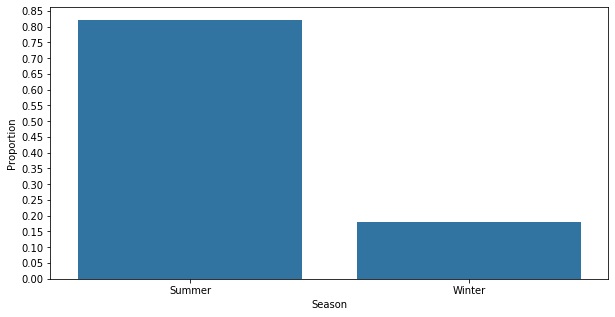

In [72]:
plt.figure(figsize = [10, 5])
# 2nd proportions
n_points = olympics.shape[0]
max_count = olympics['Season'].value_counts().max()
max_prop = max_count / n_points

# tick marks and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = [f'{v:0.2f}' for v in tick_props]

# generate plot 2
sns.countplot(data= olympics, x='Season', color= base_color)
plt.yticks(tick_props * n_points, tick_names )
plt.ylabel('Proportion');

A couple of interesting proportion statistics found:
* In terms of the Sex of the Athletes competing (1896-2016), around 72% were Male, whereas around 28% were Female
* Much of the athletes participated in the Summer format of the Olympics (around 82%) compared to the Winter format (around 18%)

When examining medal statistics, I will utilise a pie chart, using `value_counts()` to find the number (proportion) of athletes who competed (with and without a medal) and those who exclusively won a medal.

In [73]:
# Of those who competed altogether
olympics['Medal'].value_counts(normalize=False)

None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [74]:
# Those who earned a medal 
filter_1 = olympics['Medal'].isin(['None'])
olympics.loc[~filter_1]['Medal'].value_counts()[0:3]

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

Only a subset earned a medal, so it's important to distinguish the proportion of those who earned a medal and those that did not.

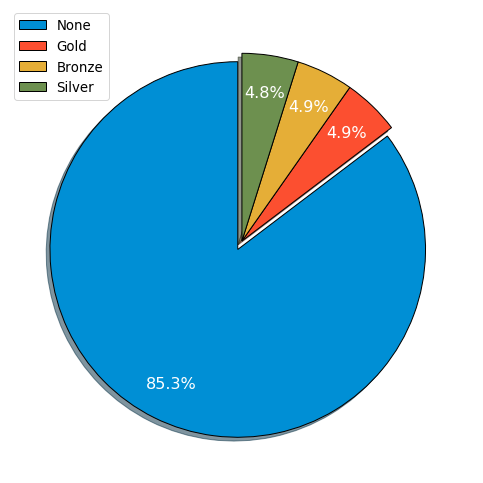

In [78]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
plt.figure(figsize = [7,10])

labels = ('None', 'Gold', 'Bronze', 'Silver') # Descending order
sizes = [231333, 13372, 13295, 13116]
explode = (0.05, 0, 0, 0) # Promote the largest portion
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f'] # color codes

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=90, pctdistance=0.8,
        textprops=dict(color="w")
        , colors=colors, wedgeprops={'edgecolor': 'black'});

plt.tight_layout() # maintains the spacing
plt.rcParams.update({'font.size': 16})
plt.legend(fontsize='small');

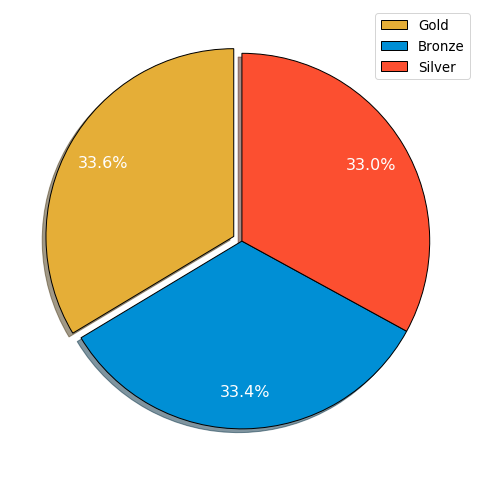

In [79]:
plt.figure(figsize = [7,10])

labels = ('Gold', 'Bronze', 'Silver') # Descending order
sizes = [13372, 13295, 13116]
explode = (0.05, 0, 0) # Promote the largest portion
colors = ['#e5ae37', '#008fd5', '#fc4f30'] # color codes

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=90, pctdistance=0.8,
        textprops=dict(color="w")
        , colors=colors, wedgeprops={'edgecolor': 'black'});

plt.tight_layout() # maintains the spacing
plt.rcParams.update({'font.size': 16})
plt.legend(fontsize='small')
plt.show();

When we take into account all athletes, around 85% did not earn a medal!
<br>
Out of around the 15% (of the dataset records between 1896-2016) left of the athletes who earned a medal, we find the following:
* The most medals obtained were **Gold** at 33.6%
* The second most medals obtained were **Bronze**, marginally lower at 33.4%
* The lowest medals obtained out the possible three were **Silver**, again marginally lower at 34%

Hence, from the medal winners, there is a near equal proportion of various medals won by athletes over 1896-2016.
<br>
This would be interesting to dig further and examine how the medals earned differ among other variables such as sex and season.

***

I will now examine the numerical (continous) variables: Age, Height and Weight.

In [80]:
olympics.describe().iloc[:, 1:4]

,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000
mean,136.424553,54.305674,1978.378480
std,73.450560,32.381492,29.877632
min,0.000000,0.000000,1896.000000
25%,157.000000,47.000000,1960.000000
50%,171.000000,64.000000,1988.000000
75%,180.000000,75.000000,2002.000000
max,226.000000,214.000000,2016.000000


Given there is a subset of Athletes with recorded personal attributes, remember to filter out the value 0!

In [83]:
# Create a copy to preserve olympics master dataset while filtering only recorded data
# Filter applies to only those Athletes having ALL their attributes recorded
olympics_numerical = olympics.query("(Age > 0.0) & (Height > 0.0) & (Weight > 0.0)").copy()

# Number of rows with Athletes having all of these attributes
number = olympics_numerical.shape[0]
proportion = olympics_numerical.shape[0]/olympics.shape[0]
print(f'The number of athletes over 1896-2016 to have all their age, height and weight data recorded: \n{number}')
print(f'the proportion of values: \n{proportion}')

The number of athletes over 1896-2016 to have all their age, height and weight data recorded: 
206165
the proportion of values: 
0.760430959441715


In [84]:
# Summary statistics
olympics_numerical.describe().iloc[1:, 0:3]

,Age,Height,Weight
mean,25.055509,175.371950,70.688337
std,5.483096,10.546088,14.340338
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000


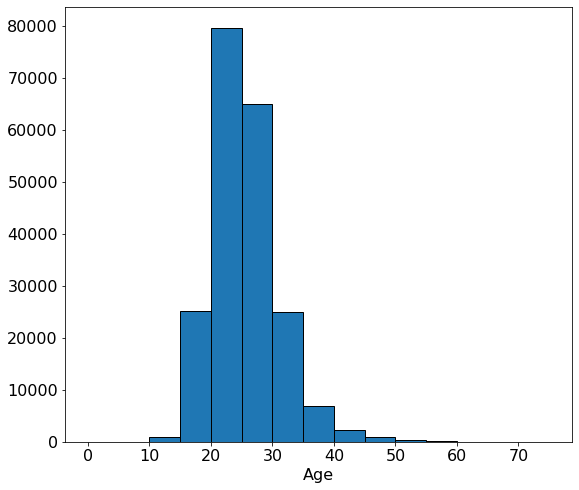

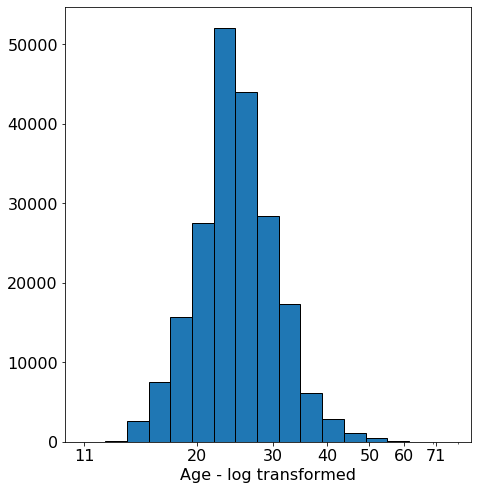

In [85]:
# start with a standard scaled plot 
plt.figure(figsize=[20, 8])
binsize = 5
bins = np.arange(0, olympics_numerical['Age'].max() + binsize, binsize)

# first subplot
plt.subplot(1,2,1)
plt.hist(data= olympics_numerical, x='Age', bins= bins, edgecolor='black')
plt.xlabel('Age')
plt.show();

# Taking the log scale for comparison
plt.figure(figsize=[16, 8])
log_binsize = 0.05
bins = 10 ** np.arange(1.04, np.log10(olympics_numerical['Age']).max() + log_binsize, log_binsize)

# Second subplot 
plt.subplot(1,2,2)
plt.hist(data = olympics_numerical, x = 'Age', bins = bins, edgecolor='black')
plt.xscale('log')
tick_locs = [11, 20, 30, 40, 50, 60, 71]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Age - log transformed')
plt.show();

There is not much difference between the normal scale and log transformation in terms of depicting a unimodal distribution for age, so there does not seem to be a serious case of there being outliers that disturb the interpretation.
* However, it is slightly clearer to see using the log transformaton, that the bins are more dense in the 20-30 (Age) bracket, as athletes tend (on average) to compete when they reach this age range
* Nevertheless, the range of values are not too long (multiplicative) to justify this transformation, so stick with its normal units

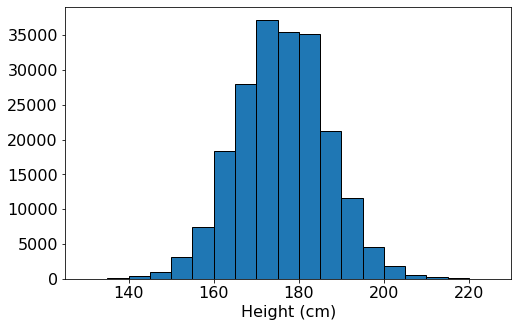

In [86]:
# distribution of Height
plt.figure(figsize=[8, 5])
binsize = 5
bins = np.arange(0, olympics_numerical['Height'].max() + binsize, binsize)

# first subplot
#plt.subplot(2,1,1)
plt.hist(data= olympics_numerical, x='Height', bins= bins, edgecolor='black')
plt.xlabel('Height (cm)')
plt.xlim((125, 230)) # removes empty space before/after min and max values
plt.show();

The height (cm) appears as a unimodal distribution and without causing too much concern when interpreting the average height of Olympic atheletes competing through 1896-2016.
* Athletes that have competed on average tend to possess a height between 165-180 cm

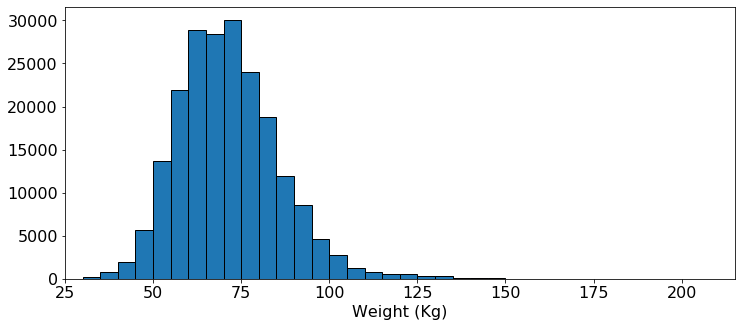

In [88]:
# distribution of weight
plt.figure(figsize=[12, 5])
binsize= 5
bins = np.arange(0, olympics_numerical['Weight'].max() + binsize, binsize)

plt.hist(data= olympics_numerical, x='Weight', bins= bins, edgecolor='black')
plt.xlabel('Weight (Kg)')
plt.xlim((25, 215)) # removes empty space before/after min and max values
plt.show();

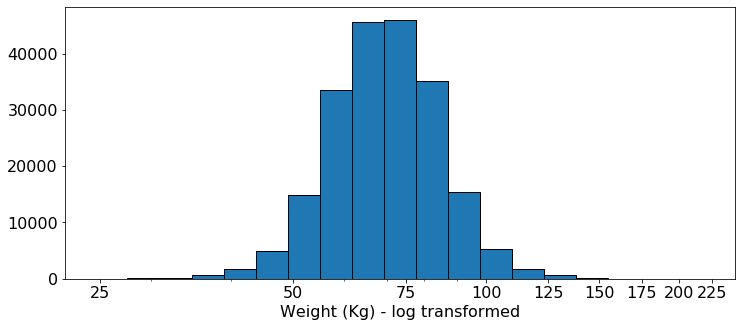

In [89]:
# Taking the log scale - given the positive (right tail) skew
plt.figure(figsize=[12, 5])
log_binsize = 0.05
bins = 10 ** np.arange(1.39, np.log10(olympics_numerical['Weight']).max() + log_binsize, log_binsize)

plt.hist(data = olympics_numerical, x = 'Weight', bins = bins, edgecolor='black')
plt.xscale('log')
tick_locs = [25, 50, 75, 100, 125, 150, 175, 200, 225]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Weight (Kg) - log transformed')
plt.show();

Much of the distribution surrounding weight (Kg) among athletes tend to be centred towards the left, with an approximate unimodal shape. 
<br>
On first inspection, there appears to be right tailed (positive) skew of height values.
<br> 
When using a  log transformation for a variable that exhibits a log-normal distribution, it is easier to see a more unimodal shape after this transformation.
* Athletes on average tend to in the weight range of around 60-75 Kg
***
A hunch I have is that even though there seems to be upper limit outliers, some Olympic events have athletes competing in explosive sports like Weightlifting.

In [90]:
olympics_numerical.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,Male,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None


In [91]:
# Examination to see which type of event/sports contain athletes with heavier weights than average

extreme_weights = olympics_numerical.query('Weight > 150').loc[:, ['Weight','Sport', 'Event']]
extreme_weights.sample(5)

,Weight,Sport,Event
173166,175.0,Judo,Judo Men's Half-Middleweight
196341,163.0,Judo,Judo Women's Heavyweight
4405,160.0,Weightlifting,Weightlifting Men's Super-Heavyweight
47984,160.0,Judo,Judo Men's Heavyweight
23156,214.0,Judo,Judo Men's Heavyweight


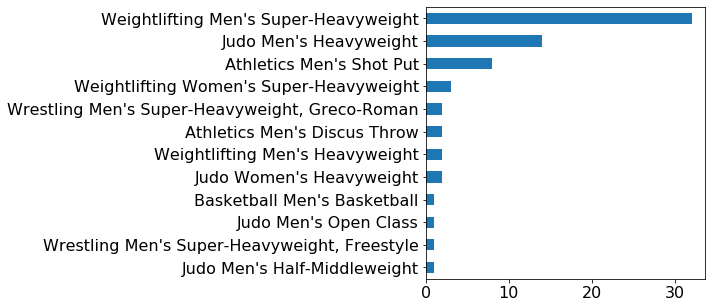

In [92]:
plt.figure(figsize=[5,5])
extreme_weights['Event'].value_counts().sort_values().plot(kind='barh');

Events like Judo, Wrestling, Discus and so on have some athletes in this category, which is not erroneous and need not necessarily be dropped.
* However, for understanding the relationship between height and weight later on, it might be worth excluding these as we can infer that they are unique to their respective class or event
***

Lastly, it might be useful to see the distribution of the numerical variables among medal winning olympians.
* N.B: This is a sample space, which requires further statistical testing for certainty about making conclusions between certain groups

In [93]:
# Filter applies to only those Athletes winning a Gold medal
olympics_gold = olympics.query("Medal == 'Gold'").copy()
olympics_silver = olympics.query("Medal == 'Silver'").copy()
olympics_bronze = olympics.query("Medal == 'Bronze'").copy()

In [94]:
# filter out missing (0) values for Gold
age_gold_filter = olympics['Age'].isin([0])
height_gold_filter = olympics['Height'].isin([0])
weight_gold_filter = olympics['Weight'].isin([0])
gold_age = olympics_gold.loc[~age_gold_filter]
gold_height = olympics_gold.loc[~height_gold_filter]
gold_weight = olympics_gold.loc[~weight_gold_filter]

In [95]:
# filter out missing (0) values for Silver
age_silver_filter = olympics['Age'].isin([0])
height_silver_filter = olympics['Height'].isin([0])
weight_silver_filter = olympics['Weight'].isin([0])
silver_age = olympics_silver.loc[~age_silver_filter]
silver_height = olympics_silver.loc[~height_silver_filter]
silver_weight = olympics_silver.loc[~weight_silver_filter]

In [96]:
# filter out missing (0) values for Bronze
age_bronze_filter = olympics['Age'].isin([0])
height_bronze_filter = olympics['Height'].isin([0])
weight_bronze_filter = olympics['Weight'].isin([0])
bronze_age = olympics_bronze.loc[~age_bronze_filter]
bronze_height = olympics_bronze.loc[~height_bronze_filter]
bronze_weight = olympics_bronze.loc[~weight_bronze_filter]

In [97]:
# colours 

gold_color = sns.color_palette()[8]
silver_color = sns.color_palette()[7]
bronze_color = sns.color_palette()[5]

Use a normalized scale via `density=True` for easier comparison between distributions among medal categories.

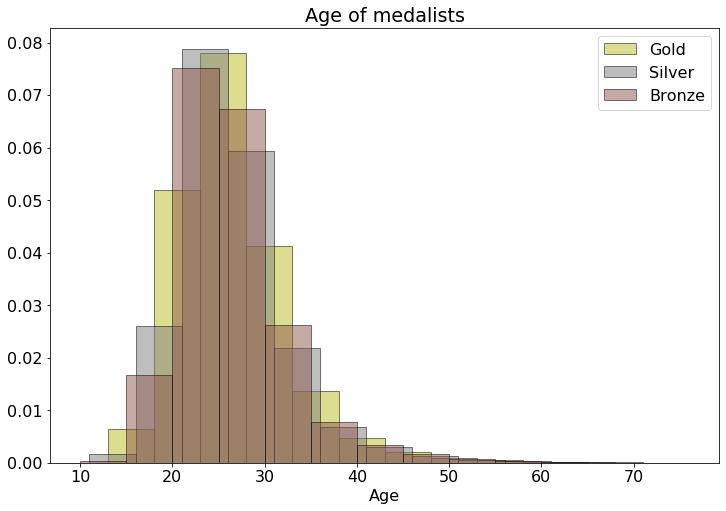

In [98]:
plt.figure(figsize=[12, 8])
binsize = 5
bins_1 = np.arange(13, gold_age['Age'].max() + binsize, binsize)
bins_2 = np.arange(11, silver_age['Age'].max() + binsize, binsize)
bins_3 = np.arange(10, bronze_age['Age'].max() + binsize, binsize)

plt.hist(data= gold_age, x='Age', bins= bins_1, color = gold_color, label='Gold', alpha=0.5, edgecolor='black', density=True)
plt.hist(data= silver_age, x='Age', bins= bins_2, color = silver_color, label='Silver', alpha=0.5, edgecolor='black', density=True)
plt.hist(data= bronze_age, x='Age', bins= bins_3, color = bronze_color, label='Bronze', alpha=0.5, edgecolor='black', density= True)
plt.xlabel('Age')
plt.title('Age of medalists')
plt.legend()
plt.show();

Similar to the age of **all athletes** competing in the Olympics, from this sample, medal winners exhibit a unimodal distribution that were mostly grouped in the age range of 20-30, but there are subtle differences among medal winners.
* Gold - Gold medalists slightly have a higher group of medal winners below the age of 20 relative Silver/Bronze, yet most gold winners are still in the mid 20-30 age range
* Silver - Silver medalists slightly have a higher group of medal winners above the age of 30 relative to Gold/Bronze, while also having slightly more medalists between the 25-30 age range
* Bronze - Bronze medalists somewhat have a higher group of medal winners entering the early 20s (20-23) age range

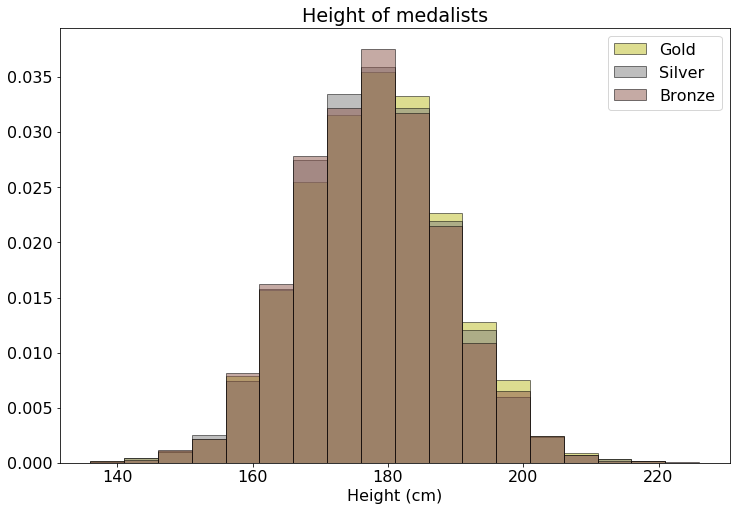

In [99]:
plt.figure(figsize=[12, 8])
binsize = 5
bins_1 = np.arange(136, gold_height['Height'].max() + binsize, binsize) # Start from miminum value
bins_2 = np.arange(136, silver_height['Height'].max() + binsize, binsize) # Start from miminum value
bins_3 = np.arange(136, bronze_height['Height'].max() + binsize, binsize) # Start from miminum value

plt.hist(data= gold_height, x='Height', bins= bins_1, color= gold_color, label='Gold', alpha=0.5, edgecolor='black', density= True)
plt.hist(data= silver_height, x='Height', bins= bins_2, color= silver_color, label='Silver', alpha=0.5, edgecolor='black', density= True)
plt.hist(data= bronze_height, x='Height', bins= bins_3, color= bronze_color, label='Bronze', alpha=0.5, edgecolor='black', density= True)
plt.xlabel('Height (cm)')
plt.title('Height of medalists')
plt.legend()
plt.show();

The Height of medal winners has a unimodal distribution as with the athletes competing in the Olympics, but tended to be slightly higher towards the 175-180 cm range than the latter. There are still some differences between the medalists.
* Gold - similar shape to the rest of the height distributions, but Gold medalists consisted of athletes having a slightly greater height after 180 cm relative to Silver/Bronze
* Silver - similar shape to the rest of the height distributions, only they were slightly more athletes in the 170-175 cm height range relative to Bronze/Gold
* Bronze - similar shape to the rest of the height distributions, but slightly more representation in the 180 cm group and the 165-170 cm group

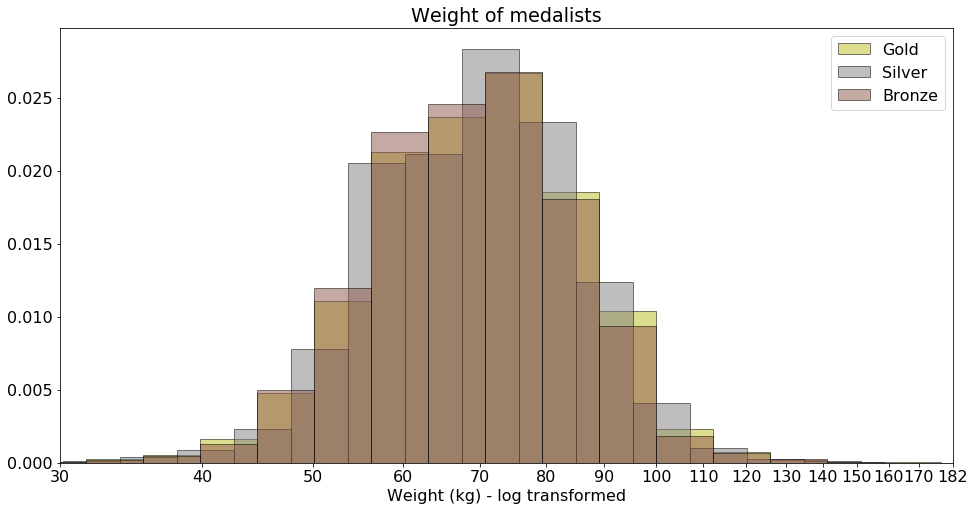

In [100]:
plt.figure(figsize=[16, 8])
log_binsize = 0.05
bins_1 = 10 ** np.arange(1.45, np.log10(gold_weight['Weight']).max() + log_binsize, log_binsize)
bins_2 = 10 ** np.arange(1.48, np.log10(silver_weight['Weight']).max() + log_binsize, log_binsize)
bins_3 = 10 ** np.arange(1.45, np.log10(bronze_weight['Weight']).max() + log_binsize, log_binsize)

plt.hist(data= gold_weight, x='Weight', bins= bins_1, color = gold_color, label='Gold', alpha=0.5, edgecolor='black', density= True)
plt.hist(data= silver_weight, x='Weight', bins= bins_2, color = silver_color, label='Silver', alpha=0.5, edgecolor='black', density= True)
plt.hist(data= bronze_weight, x='Weight', bins= bins_3, color = bronze_color, label='Bronze', alpha=0.5, edgecolor='black', density= True)
plt.xscale('log')
tick_locs = [30,40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 182]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Weight (kg) - log transformed')
plt.title('Weight of medalists')
plt.xlim((30,182))
plt.legend()
plt.show();

The height of medal winners exhibit a unimodal distribution as with the athletes competing in the Olympics, where most medal winners' weights are grouped in the range of 65-80 kg. Although some differences exist among the medalists.
* Gold - similar shape to the rest of the weight distributions, but had more athletes weighing abve 80 kg relative to Bronze medalists
* Silver - similar shape to the rest of the weight distributions, only taking into consideration the gaps between weight bins
* Bronze - similar shape to the rest of the weight distributions, but slightly higher group of athletes at the peak (average) group relative to Silver/Gold

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The weight variable took on an extensive range of values, to which I used a log transformation to correct for this, which appeared more centred and less (positive/right) skewed afterwards while retaining the unimodal shape. Most athletes are grouped in the weight range of around 60-75 kg. I also did this for age, to lessen the binning bias and make it easier to show where most athletes are grouped (on average) at the 20-30 age range. Nevertheless, this wasn't necessary like for weight, as it took values into the 100s, so I believe leaving age as is should be fine.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Given I already had to filter out the 0 (null) values for my numeric variables (Age, Height and Weight), there were upper limit outliers for weight, but I had to take this into consideration as not being erroneous, given explosive sports that tended to have athletes weighing well above the average for their respective events. Hence, the log transformation as above was enough to alleviate this issue.

## Bivariate Exploration <a class="anchor" id="fourth-head"></a>

Moving on, I will look to uncover relationships and patterns between the variables (features).

In [103]:
# Numerical variables of immediate interest
numeric_vars = ['Age', 'Height', 'Weight']

# categorical variables of interest (all)
category_vars = ['Sex', 'Season', 'Medal']

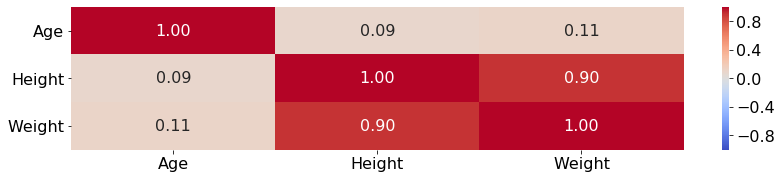

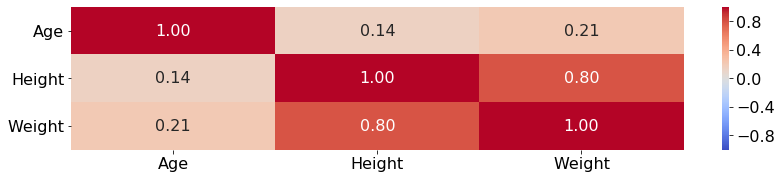

In [104]:
# correlation plot
plt.figure(figsize = [12, 5])
 
plt.subplot(2,1,1)
sns.heatmap(olympics[numeric_vars].corr(), 
            cmap='coolwarm', vmin=-1, annot=True, center=0, 
            fmt = '.2f')
plt.tight_layout()
plt.show();

# correlation plot - correcting for null values
plt.figure(figsize = [12, 5])
 
plt.subplot(2,1,2)
# consider using attributes that filter out 0 values
sns.heatmap(olympics_numerical[numeric_vars].corr(), 
            cmap='coolwarm', vmin=-1, annot=True, center=0, 
            fmt = '.2f')
plt.tight_layout();
plt.show();

As inferred from the correlation heatmap, height and weight of athletes are positively (strongly) correlated. When filtering out the nil values, the correlation coefficient goes from being 0.9 (very strong positive correlation) to 0.8 (strong positive correlation), while the other pairwise correlations remain weak.
* I'll examine this further via a histogram heatmap for height and weight to uncover the density and color spots
* In the multivariate section, I'll look to discover how height and weight have an effect on athletes' weight

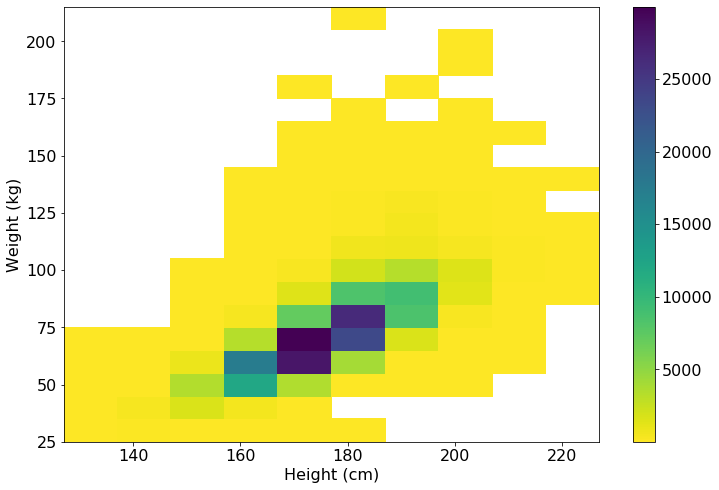

In [105]:
plt.figure(figsize = [12, 8])
bins_x = np.arange(127, 226+10, 10)
bins_y = np.arange(25, 214+10, 10)

h2d = plt.hist2d(data= olympics_numerical, x= 'Height', y='Weight', 
          range= ((127,226),(25,214)), cmap='viridis_r',
          bins= [bins_x, bins_y], cmin=0.5)

plt.colorbar()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)');

This elaborates on how there is strong linear correlation between height and weight that is predictable.
* As the heights of athletes increase, their weight also tends to increase
* The 'hotspots' of shading also confirm that most (on average) athletes tend to be in the 165-180 cm height range as illustrated in the height distributions
* Most athletes' weight are grouped in the 60-75 kg range as also confirmed by the weight distributions

Lastly, visualising a fitted regression based on weight on height will make us better understand this relationship and at what points are there variability above a limit (outliers).

In [106]:
# transforming Weight to a log

def log_trans(y, inverse = False):
    """ A function to transform the specified y variable to a log,
    while preserving its original value by taking the inverse
    simultaneously """
    if not inverse:
        return np.log10(y) # we want to transform
    else:
        return np.power(10, y) # we want to preserve (orig values)
    
# Feature engineering to transform weight variable to log
olympics_numerical['log_weight'] = olympics_numerical['Weight'].apply(log_trans)

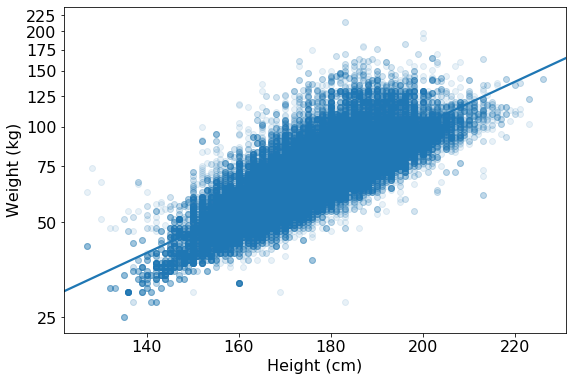

In [107]:
# regplot to illustrate this relationship fit closer 
fig, ax = plt.subplots(figsize = [9,6])
g = sns.regplot(data = olympics_numerical, 
            x= olympics_numerical['Height'], 
            y= olympics_numerical['log_weight'], 
            scatter_kws = {'alpha' : 1/10}, ax=ax)

# No need to set y scale - plt.yscale('log') - for log as its already transformed

tick_locs = np.arange(25, 214+25, 25)
#plt.xlim(126,227)
#plt.ylim(1.38, 2.34)
plt.yticks(log_trans(tick_locs), tick_locs)
plt.ylabel('Weight (kg)')
plt.xlabel('Height (cm)')
#plt.text(130, 2.28, r'$\rho=0.8$')
#plt.grid(True, linestyle='-', linewidth=0.5)
plt.show();

Using the log scale for Weight as above when illustrating the distribution of athletes' weights, we see a predictable linear relationship.
* Outliers are present, but they are not too extreme as first perceived such as those weighing above 200 kg

***
Moving on, I would like to examine the categorical variables based on these attribute characteristics of athletes (numeric variables).

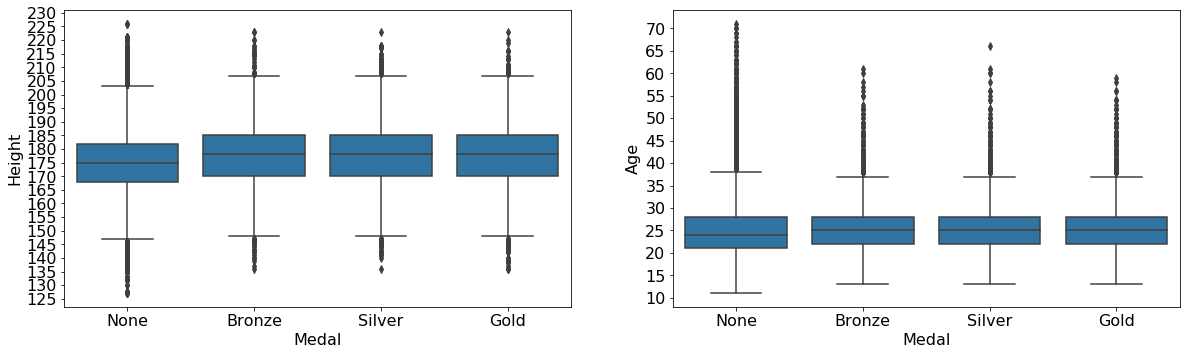

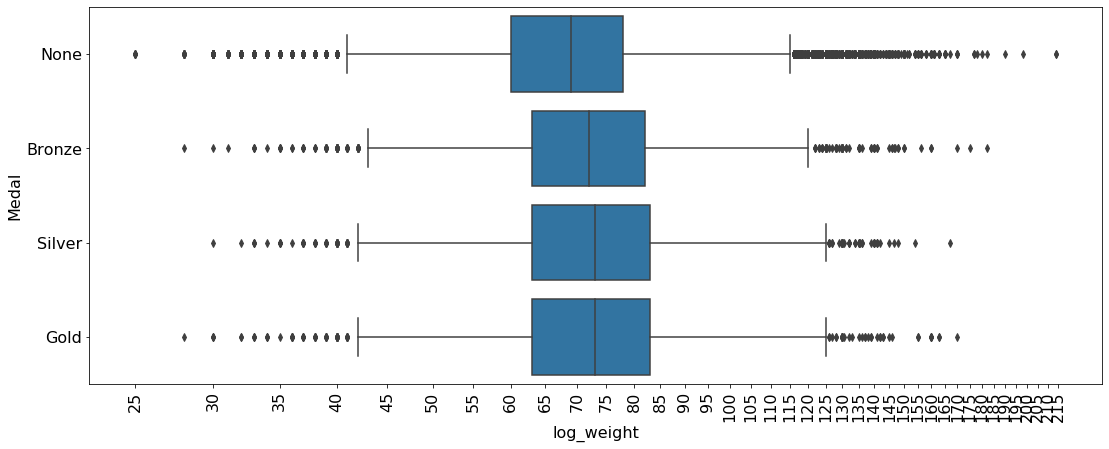

In [108]:
base_color = base_color

plt.figure(figsize = [20, 12])

plt.subplot(2,2,1)
sns.boxplot(data = olympics_numerical, x='Medal', y='Height', color= base_color)
plt.yticks(np.arange(125, 226+5, 5))

plt.subplot(2,2,2)
sns.boxplot(data= olympics_numerical, x='Medal', y='Age', color = base_color)
plt.yticks(np.arange(10, 70+5, 5))
plt.ylabel('Age');

plt.figure(figsize = [30, 12])
plt.subplot(2,2,3)
sns.boxplot(data= olympics_numerical, y='Medal', x='log_weight', color = base_color)
tick_locs = np.arange(25, 214+5, 5)
plt.xticks(log_trans(tick_locs), tick_locs, rotation= 90);

plt.tight_layout();

Elaborating from the earlier univariate exploration of the distribution of personal attributes among medal categories, the measures of location gives us more precise (exact bin rather than a range) and slightly different interpretations:
* **Height** - The median Height (average) of athletes competing without winning a medal (None) is 175 cm, but those who earned a medal at any level each had a median height of 178 cm. 
* **Age** - The median Age of athletes participating without winning a medal is 24, but the median age of medal winners is around 25.
* **Weight** (log-transformed given earlier log-normal distribution) - The median Weight of athletes participating without winning a medal is around 68 kg. Bronze medalists also have a slightly higher median weight at around 71 kg. Interestingly, gold and silver medalists have a higher median weight than non-medalists, while also having slightly higher weight than Bronze medalists at 73 kg.

N.B -  medalists are part of a subset group (sample), whereas non-medalists have many more athletes with recorded personal attributes altogether. Hence, there are many outliers (upper/lower) for non-medalists that can skew the median to one side. Nevertheless, it's important to look at the distribution, while also illustrating quartiles which are achievable via a `violinplot`.

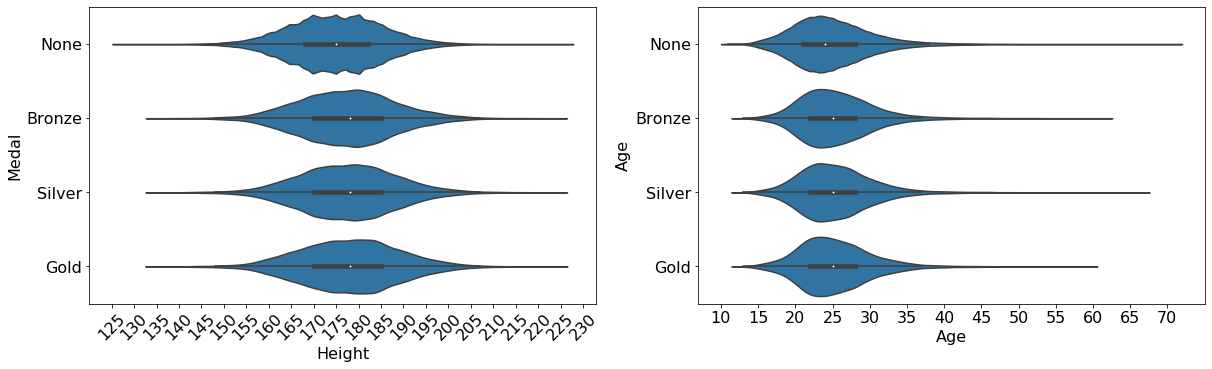

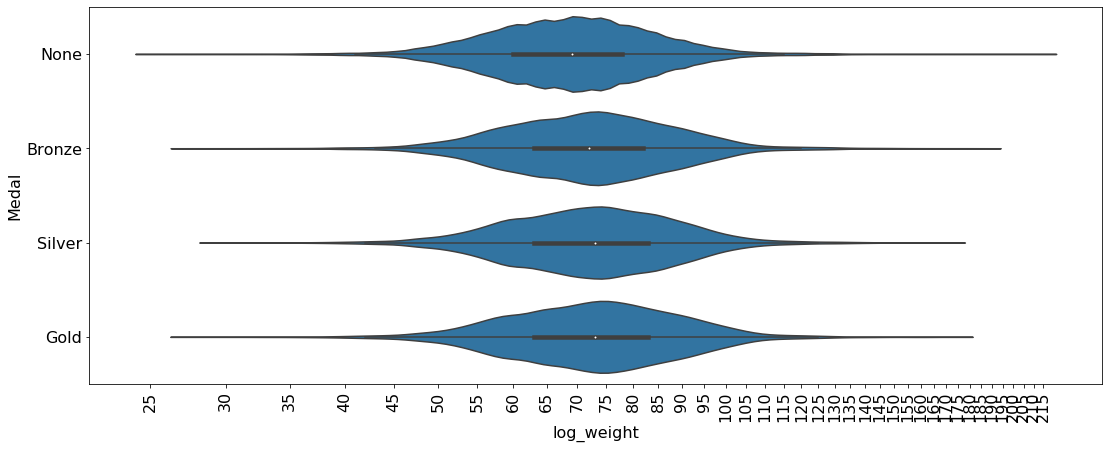

In [109]:
base_color = base_color

plt.figure(figsize = [20, 12])

plt.subplot(2,2,1)
sns.violinplot(data = olympics_numerical, y='Medal', x='Height', color= base_color)
plt.xticks(np.arange(125, 226+5, 5), rotation= 45)

plt.subplot(2,2,2)
sns.violinplot(data= olympics_numerical, y='Medal', x='Age', color = base_color)
plt.xticks(np.arange(10, 70+5, 5))
plt.ylabel('Age');

plt.figure(figsize = [30, 12])
plt.subplot(2,2,3)
sns.violinplot(data= olympics_numerical, y='Medal', x='log_weight', color = base_color)
tick_locs = np.arange(25, 214+5, 5)
plt.xticks(log_trans(tick_locs), tick_locs, rotation= 90);

plt.tight_layout();

Furthermore, these plots allow us to interpret the distribution of each of the athletes' personal attributes - between medal and non-medal winners:

* **Height** - Interestingly, the distribution for Height among standard competitors (None) appears to be trimodal, where peaks exist between the 165-180 cm range. For each of the medal winners, height appears to be slightly negative (left) skewed centred between 175-180 cm, given that medal winners tend to be slightly taller than standard competitors.
* **Age** - The age distribution looks positive (right) skewed centered at the middle of 20-25 years for all athletes (standard competitors and medalists). As mentioned above, only the median age for medalists in each medal class is slightly higher than for standard competitors.
* **Weight** (log-normal transformation) - Weight for standard competitors appears to be *slightly* trimodal, given peaks between 60-80 kg. The weight distributions for each medalist class look evenly (log-normal) distributed, mainly centred around 70-75 kg. Median weight for medalists in each medal class is higher than for standard competitors, though Silver and Gold medalists weighed slightly more than Bronze medalists.

***
Let's also check the how medal counts differ among at least 2 categorical features.

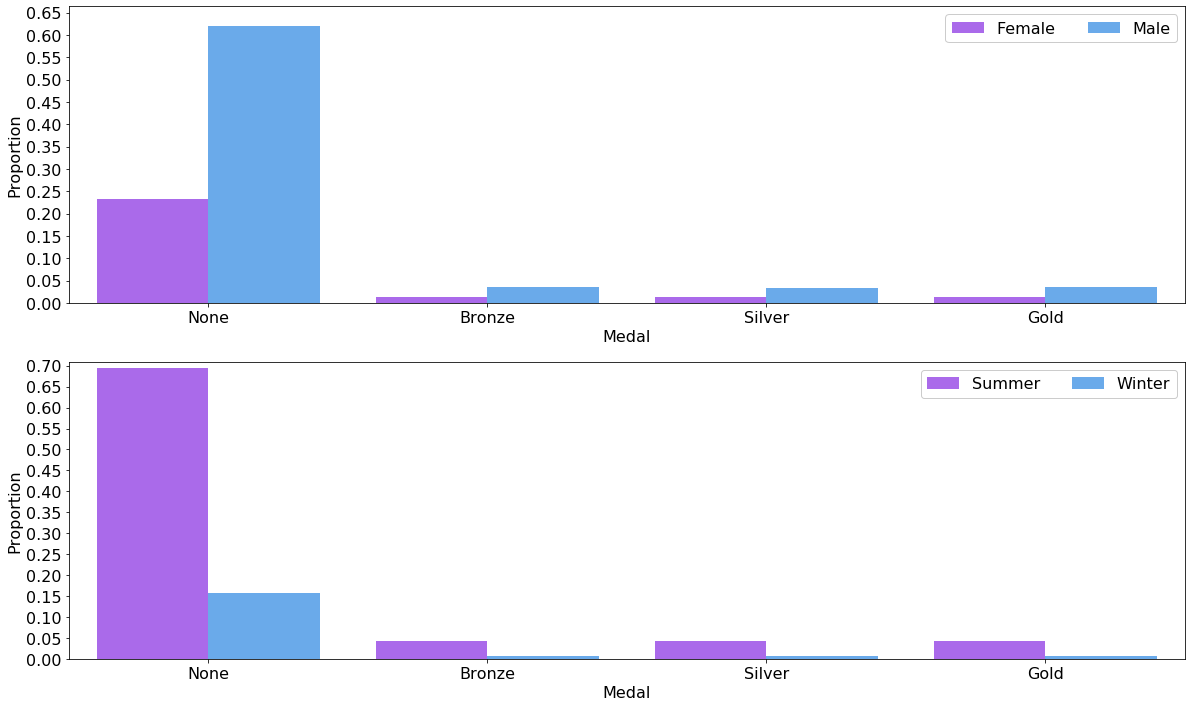

In [110]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = olympics.shape[0]
max_count = olympics['Sex'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = [f'{v:0.2f}' for v in tick_props]

plt.figure(figsize = [20, 12])
plt.subplot(2,1,1)
ax = sns.countplot(data= olympics, x= 'Medal', hue='Sex', palette='cool_r')
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion')
plt.ylim((0,180000))
ax.legend(loc = 'best', ncol = 2, framealpha = 1);
#plt.legend(bbox_to_anchor=(1.4, 0.5), loc='right');

plt.subplot(2,1,2)
ax = sns.countplot(data= olympics, x= 'Medal', hue='Season', palette='cool_r')
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion')
plt.ylim((0,192000))
ax.legend(loc = 'best', ncol = 2, framealpha = 1);

This again confirms from above that most Olympic (None) competitiors were male and also adds that males (though marginal) had higher medals counts in each class than females.

Likewise, most Olympic competitors participated in the summer iterations of Olympics than in winter iterations, which also translated into more medals earned in each medal class for summer sports than in winter sports.

In [111]:
# summer events 
filter_summer = olympics['Season'].isin(['Summer'])
summer_events = olympics.loc[filter_summer]
print(summer_events['Sport'].value_counts().head(5))

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


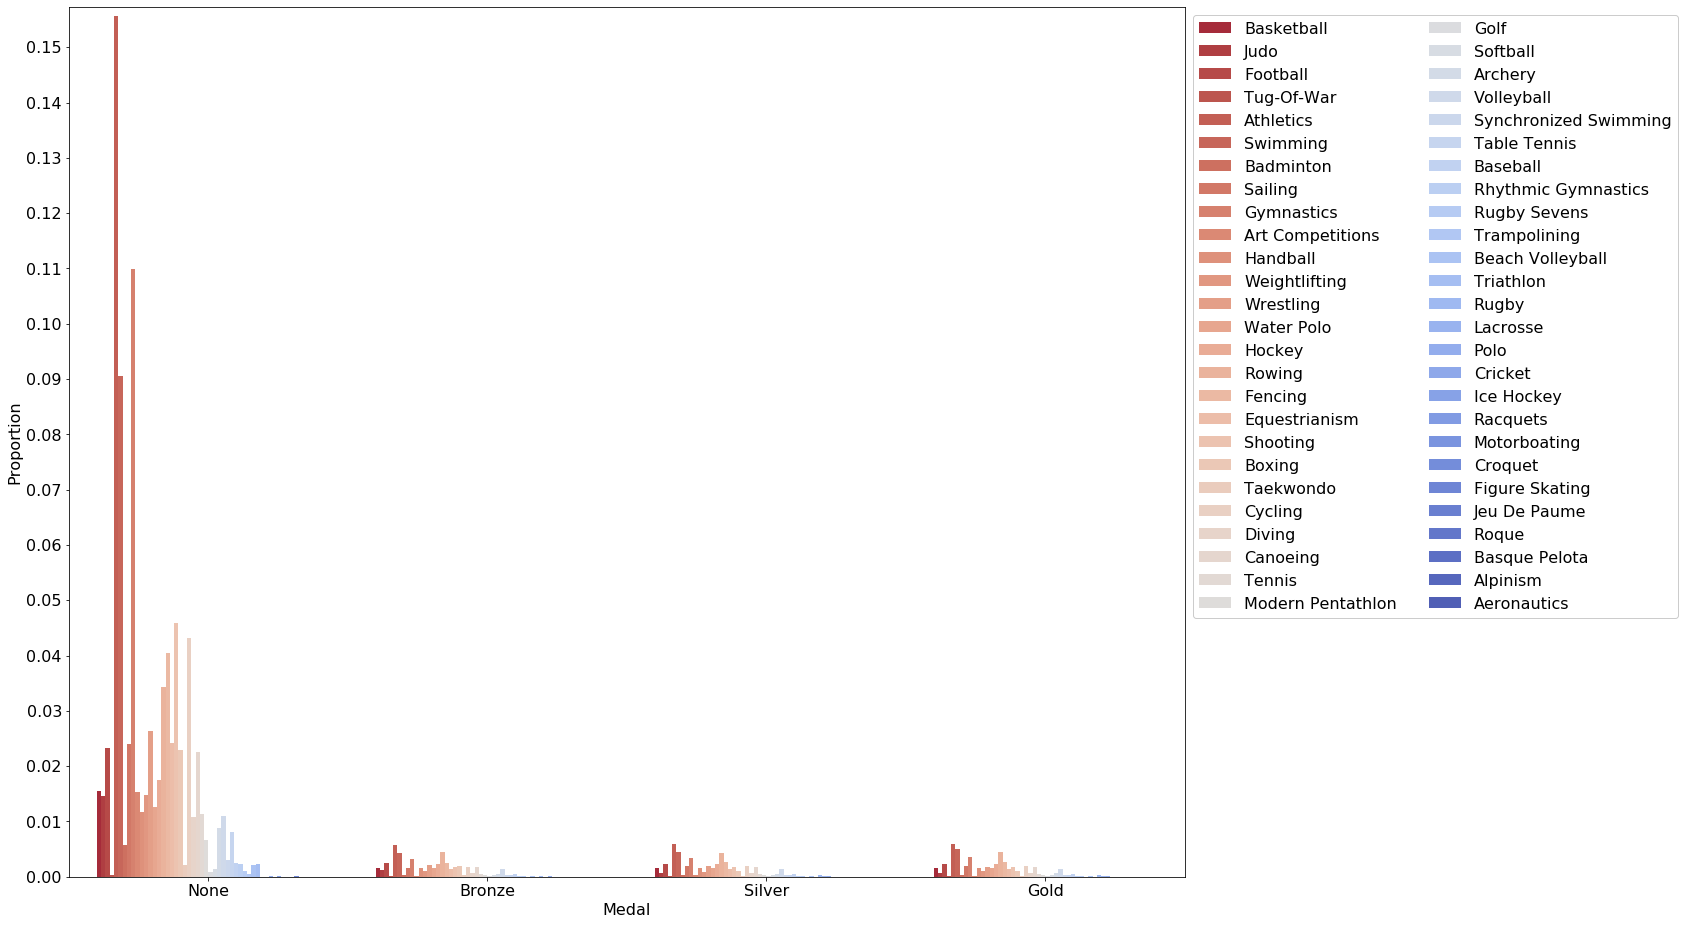

In [112]:
plt.figure(figsize=[20,16])

n_points = summer_events.shape[0]
max_count = olympics['Medal'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.01, 0.01)
tick_names = [f'{v:0.2f}' for v in tick_props]

ax = sns.countplot(data= summer_events, x='Medal', hue='Sport', palette='coolwarm_r') # diverging palette is helpful
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion')
plt.ylim((0, 35000))
ax.legend(loc = 'best', ncol = 2, framealpha = 1, bbox_to_anchor=(1, 1));

Interestingly from the data regarding athletes competing in the Olympics between 1896-2016, we see a trend that's also confirmed from above.
> Sports where there tended to be more competitors irrespective of medals earned (None) also were among those where athletes earned the most medals. These also correspond among the highest.

Groups - most popular Summer sporting events include Athletics (indoor/track), Gymnastics (outdoor) and Swimming (Aquatics) respectively, which also happen to be among the [most popular sports to watch at the Olympics](<https://bleacherreport.com/articles/2656664-ranking-the-top-ten-olympic-sports-to-watch>).
* These sports also happen to be present since the earliest edition

In [113]:
# winter events 
filter_winter = olympics['Season'].isin(['Winter'])
winter_events = olympics.loc[filter_winter]
print(winter_events['Sport'].value_counts().head(18))

Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Nordic Combined              1344
Freestyle Skiing              937
Snowboarding                  936
Curling                       463
Skeleton                      199
Military Ski Patrol            24
Alpinism                       21
Name: Sport, dtype: int64


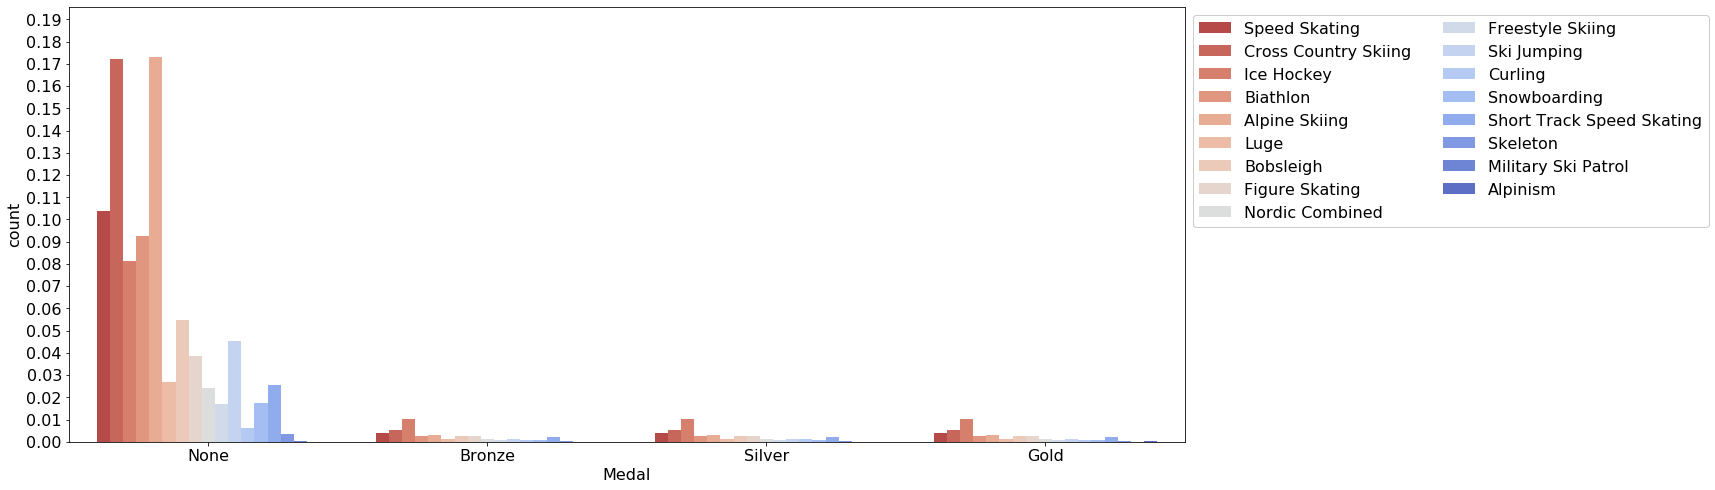

In [114]:
plt.figure(figsize=[20,8])

n_points = winter_events.shape[0]
max_count = olympics['Medal'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.01, 0.01)
tick_names = [f'{v:0.2f}' for v in tick_props]


ax = sns.countplot(data= winter_events, x='Medal', hue='Sport', palette='coolwarm_r')
plt.yticks(tick_props * n_points, tick_names)
plt.ylim((0, 9500))
ax.legend(loc = 'best', ncol = 2, framealpha = 1, bbox_to_anchor=(1, 1));

This confirms that the Winter Olympics has fewer competitors while also being more specialised (less diverse) in its sporting events that athletes can participate in. But this does not exactly follow the trend (correlation) between the most athletes participating alongside winning a medal and most medals achieved in each group.
* Groups - Among the most popular Winter events were Cross Country Skiing, Alpine Skiing and Speed Skating respectively
* Medals - Yet, athletes in each medal category (Bronze, Silver, Gold) had the highest medal count in Ice hockey Sports, while Cross Country Skiing and Speed Skating came in second and third for medals won by athletes competing at the Winter Olympics

Hence, the statement above for the Summer Olympics could be some other factor at play or something that is inextricable in the data.
* I also want to check when the earliest Winter Olympics event was held, as I believe it could have started later

***
Lastly, given the year and host cities, I want to see if host countries have a home advantage when competing at the Olympics.

In [115]:
# Winter hosts 
filter_winter = olympics['Season'].isin(['Winter'])
olympics_winter_hosts = olympics.loc[filter_winter].copy()
olympics_winter_hosts[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
672,1924,Chamonix
935,1928,St. Moritz
1326,1932,Lake Placid
1327,1936,Garmisch-Partenkirchen
1187,1948,St. Moritz
110,1952,Oslo
111,1956,Cortina
83,1960,Squaw Valley
85,1964,Innsbruck
266,1968,Grenoble


Interestingly, the Winter Olympics began from **1924**, which can somewhat explain why there are fewer olympic Athletes participating in Winter events relative to Summer events that have been ongoing since **1896**.

In [116]:
# Summer hosts 
filter_summer = olympics['Season'].isin(['Summer'])
olympics_summer_hosts = olympics.loc[filter_summer].copy()
olympics_summer_hosts[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Antwerp
3,1900,Paris
711,1904,St. Louis
268,1906,Antwerp
1149,1908,London
35,1912,Stockholm
2,1920,Athens
39,1924,Paris
133,1928,Amsterdam
26,1932,Los Angeles


I am going to use a pivot table to construct a count of medals for each country and eventually a percentage change for which to gauge medal yearly comparisons.

In [117]:
# Constructing pivot tables for winter and summer editions
# Use NOC as the key to join different tables 

medal_counts_winter = olympics_winter_hosts.pivot_table(columns= 'NOC', values= 'Name'\
                                                       , aggfunc= 'count', index= 'Year')
medal_counts_summer = olympics_summer_hosts.pivot_table(columns= 'NOC', values= 'Name'\
                                                       , aggfunc= 'count', index= 'Year')

In [118]:
# Calculating fractions of total medals won by country per year

fractions_winter = medal_counts_winter.divide(olympics_winter_hosts.shape[0], axis='rows')
fractions_summer = medal_counts_summer.divide(olympics_summer_hosts.shape[0], axis='rows')

In [119]:
# Use the expanding mean - mean considering all the data available up to that point in time
mean_winter_fractions = fractions_winter.expanding().mean()
mean_summer_fractions = fractions_summer.expanding().mean()

# Computing the percentage change
fractions_winter_change = mean_winter_fractions.pct_change() * 100
fractions_summer_change = mean_summer_fractions.pct_change() * 100

# reset the index 
fractions_winter_change = fractions_winter_change.reset_index()
fractions_summer_change = fractions_summer_change.reset_index()

In [120]:
#fractions_winter_change.head()

In [121]:
# We need it in tidy form for eventual analysis

panel_winter = pd.melt(fractions_winter_change, id_vars= 'Year', value_name= 'Pct_change', var_name= 'NOC')
panel_summer = pd.melt(fractions_summer_change, id_vars= 'Year', value_name= 'Pct_change', var_name= 'NOC')

In [122]:
panel_winter.head(2) # check

,Year,NOC,Pct_change
0,1924,AHO,NaN
1,1928,AHO,NaN


In [123]:
# Building summer hosts 
olympic_summer_hosts = olympics_summer_hosts[['Year', 'City']].drop_duplicates().sort_values('Year')
summer_hosts = olympic_summer_hosts.reset_index(drop=True)

# Change cities: Antwerp for Athens and vice-versa
summer_hosts = summer_hosts.replace({'Antwerp':'Athens'})
summer_hosts.at[6,'City'] = 'Antwerp'

# Correct Roma to Rome
summer_hosts = summer_hosts.replace({'Roma':'Rome'})

# Drop Athens 1906 as it was a subset and not counted by the IOC
# Drop Stockholm 1956 as it was subset as well
summer_hosts = summer_hosts.drop(summer_hosts.index[[3,13]])

# Map the NOCs
mapping = {'Athens': 'GRE', 'Paris': 'FRA', 'St. Louis': 'USA', 'London':'GBR', 'Stockholm':'SWE'\
          , 'Antwerp':'BEL', 'Amsterdam':'NED', 'Los Angeles':'USA', 'Berlin':'GER', 'Helsinki':'FIN'\
          , 'Melbourne':'AUS', 'Rome':'ITA', 'Tokyo':'JPN', 'Mexico City':'MEX', 'Munich':'FRG'\
          , 'Montreal':'CAN', 'Moscow':'URS', 'Seoul':'KOR', 'Barcelona':'ESP', 'Atlanta':'USA'\
          , 'Sydney':'AUS', 'Beijing':'CHN', 'Rio de Janeiro':'BRA'}

summer_hosts['NOC'] = summer_hosts['City'].map(mapping)

In [124]:
#summer_hosts

In [125]:
olympic_winter_hosts = olympics_winter_hosts[['Year', 'City']].drop_duplicates().sort_values('Year')
winter_hosts = olympic_winter_hosts.reset_index(drop=True)
winter_hosts

# Map the NOCs
mapping = {'Chamonix':'FRA', 'St. Moritz':'SUI', 'Lake Placid':'USA', 'Garmisch-Partenkirchen':'GER'\
          , 'Oslo':'NOR', 'Cortina':'ITA', 'Squaw Valley':'USA', 'Innsbruck':'AUT','Grenoble':'FRA'\
          , 'Sapporo':'JPN', 'Sarajevo':'YUG', 'Calgary':'CAN', 'Albertville':'FRA', 'Lillehammer':'NOR'\
          , 'Nagano':'JPN', 'Salt Lake City':'USA', 'Torino':'ITA', 'Vancouver':'CAN', 'Sochi':'RUS'}

winter_hosts['NOC'] = winter_hosts['City'].map(mapping)

In [126]:
#winter_hosts

Final stage - merge dataframes for **Winter and Summer**.
* N.B - the first edition holds a 'NAN' for both Winter and Summer due to no previous data/years being available

In [130]:
# Final stage: merge dataframes for winter 
merged_winter = pd.merge(panel_winter, winter_hosts, how='inner')
winter_effect = merged_winter.set_index('Year').sort_index()
#winter_effect

In [131]:
# Merge for summer 
merged_summer = pd.merge(panel_summer, summer_hosts, how='inner')
summer_effect = merged_summer.set_index('Year').sort_index()
#summer_effect

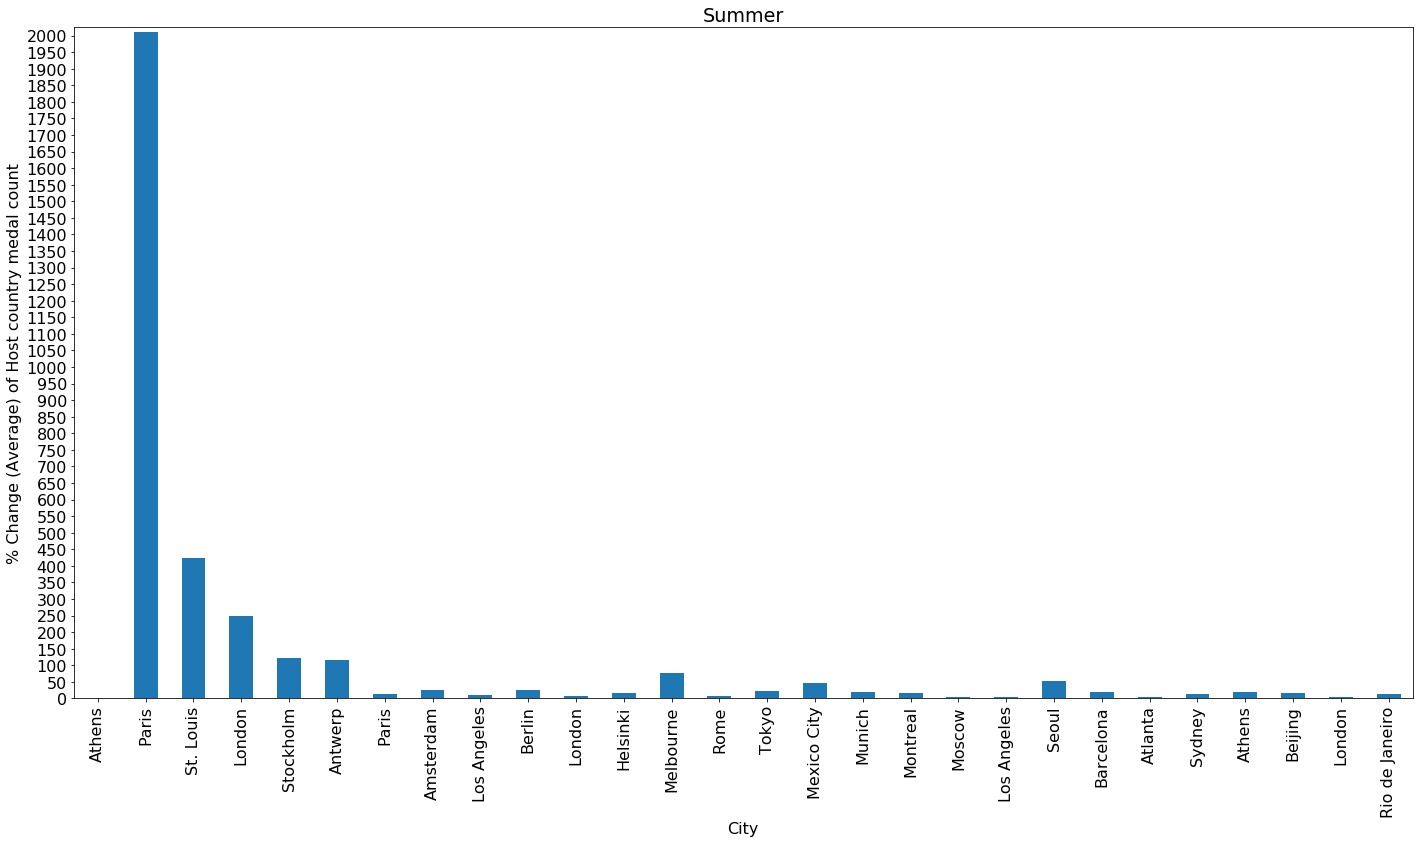

In [132]:
summer_effect.plot(kind= 'bar', x='City', y='Pct_change', legend=False, title='Summer', figsize=[20,12])
tick_locs = np.arange(0, 2000+50, 50)
plt.yticks(tick_locs, tick_locs)
plt.ylim((0,2025))
plt.ylabel('% Change (Average) of Host country medal count')
plt.tight_layout()
#plt.gca().invert_yaxis()

For hosts of the Olympics during the Summer Season, the early years have a significant effect on medals earned. Paris (France) seems to be a massive outlier with around a 2000% increase from the prior edition, which drastically declines but remains high for the next four host cities/countries, gradually declining between 450-100% - USA, Britain, Sweden and Belgium respectively.

Between 1920 Antwerp (Belgium) and 2016 Rio (Brazil), there were not many cities/countries that had a significant enough effect of winning medals (≈50-100%) when they were hosts other than 1956 Melbourne (Australia), 1968 Mexico City (Mexico) and 1988 Seoul (South Korea). 

Hence, over time, the host advantage with regards to the Summer Olympics has diminished **overall** and cannot fully explain how a host is meant to perform/excel typically, but can be insightful to suggest that being a host city can somewhat contribute to a country's success as is empirically shown for some past countries/cities.

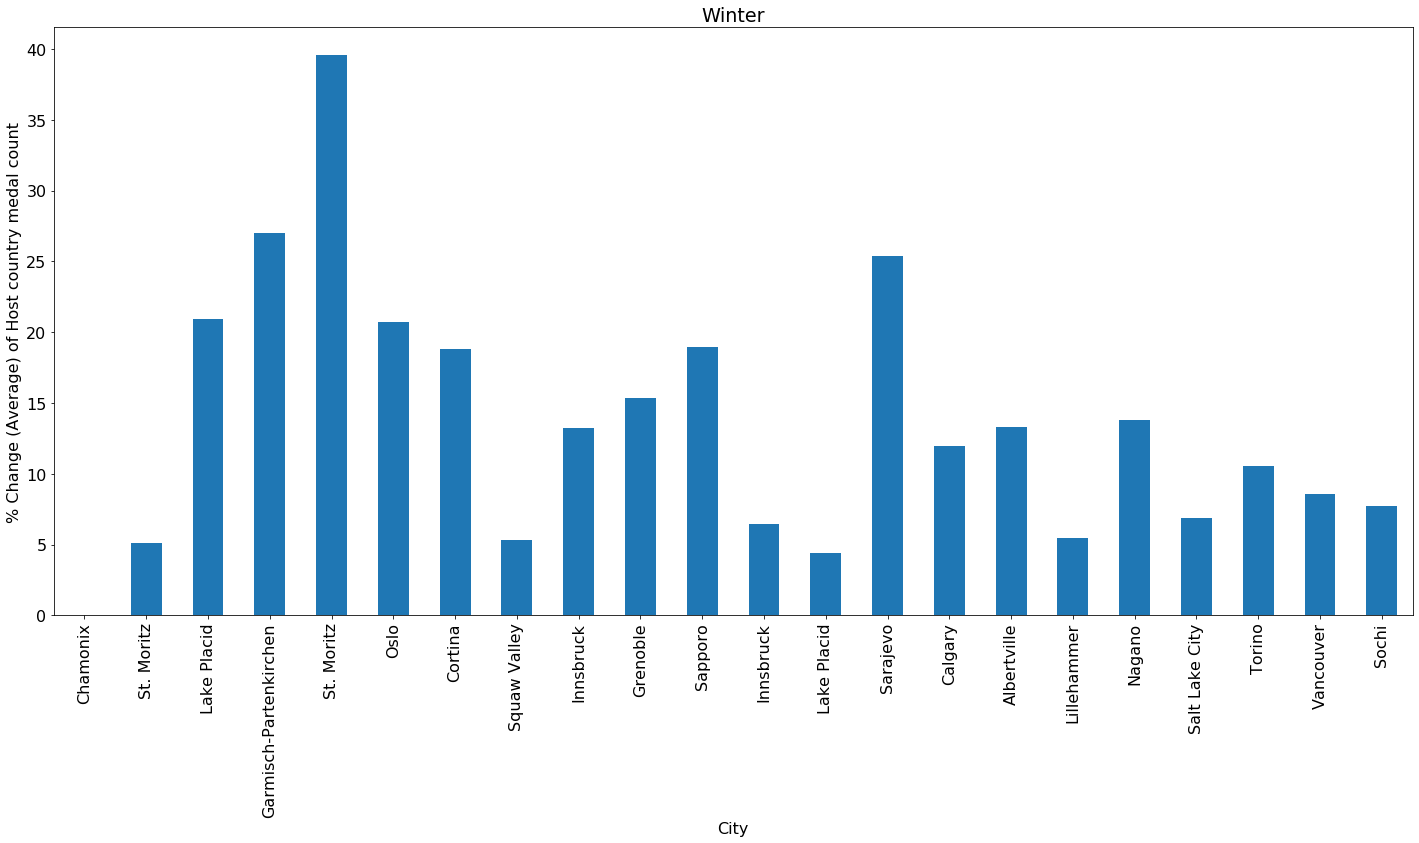

In [133]:
winter_effect.plot(kind='bar', x='City', y='Pct_change', legend=False, title='Winter', figsize=[20,12])
plt.ylabel('% Change (Average) of Host country medal count')
plt.tight_layout();

Additionally, for hosts of the Olympics during the Winter Season, the highest effect for a city on medals earned relative to earlier performances also came early on via the fourth edition, 1948 St. Moritz (Switzerland) at around 40%, but compared to Summer Olympic editions, this is marginal compared to other Summer host successes.

Between 1948 St. Moritz and 2014 Sochi (Russia), only Sarajevo (then known as Yugoslavia) in 1984 managed to get anywhere close to this with total medals earned at 25% compared to previous years of participation.

Like above with Summer hosts, the host advantage with regards to the Winter Olympics has diminished **overall**, but was never that significant to begin with relative to Summer editions. Hence, this is not promising enough to suggest an overall performance boost from being a winter host, but as somewhat shown empirically, it can marginally contribute to country's success at the Winter Olympics.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Medals and events (Summer and Winter)
* Starting from the Summer events, we see that Athletics, Swimming and Gymnastics tend to be among the top three sports Athletes compete respectively, regardless of winning a medal or as a standard competitor. However, looking at Winter events, the top three events undertaken by standard competitors - Cross Country Skiing, Alpine Skiing and Speed Skating respectively - *do not* correspond to the order that Athletes earn medals in each category, as Ice Hockey, Cross Country Skiing and Speed Skating respectively represent the most medals earned in each Sport. Hence, we cannot infer a correlation of some sorts between the most common sport events that standards Athletes compete and the number of medals Athletes earn from each Sport. 

Medals and host cities (Summer and Winter)
* Some commentators suggest that for every 4 year iteration of the Olympics, the Host country performs particularly well, perhaps given their familiarity of the surroundings etc. This is mostly the case for the Summer Olympics, especially during the early years between 1900-1920. It gradually declined and this significant advantage only appeared sporadically afterwards, during 1956 (Melbourne) and 1988 (Seoul). This trend was not too supported in the Winter Olympics (relative to Summer), but had a similar early advantage between 1928-1948 and afterwards tapered off, where only in 1984 (Yugoslavia) was there a close enough significant effect to early years. Hence, there is empirical evidence to support this statement in some cases, but it is not consistent/significant enough to certify a relationship with being a host and excelling at the Olympics for Countries.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Weight and Height
* Weight and Height as found conventionally, has a positive correlation among Olympic Athletes. There were outliers which somewhat lowered its strength, but nevertheless, it stands in good stead for a strong relationship. Looking further at the distribution through boxplots and violin plots, there was much less variation and higher medians in terms of the personal attributes shown for medalists then for standard competitors, but we have to consider that standard competitors were part of a bigger sample size compared to medalists which part of a subset.



## Multivariate Exploration <a class="anchor" id="fifth-head"></a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

I mainly want to explore how my main feature/categorical variable medal differs amongst the two other categorical variables for multivariate analysis. I also want to deepen my observation of Height vs. Weight from the bivariate exploration to compare among different categorical variables as well.

In [116]:
#olympics_numerical.info()

Revist the numeric relationships

In [117]:
numeric_vars_ext = ['Age', 'Height', 'Weight', 'log_weight', 'Year']

/Users/ShuaibAhmed/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/ShuaibAhmed/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ShuaibAhmed/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


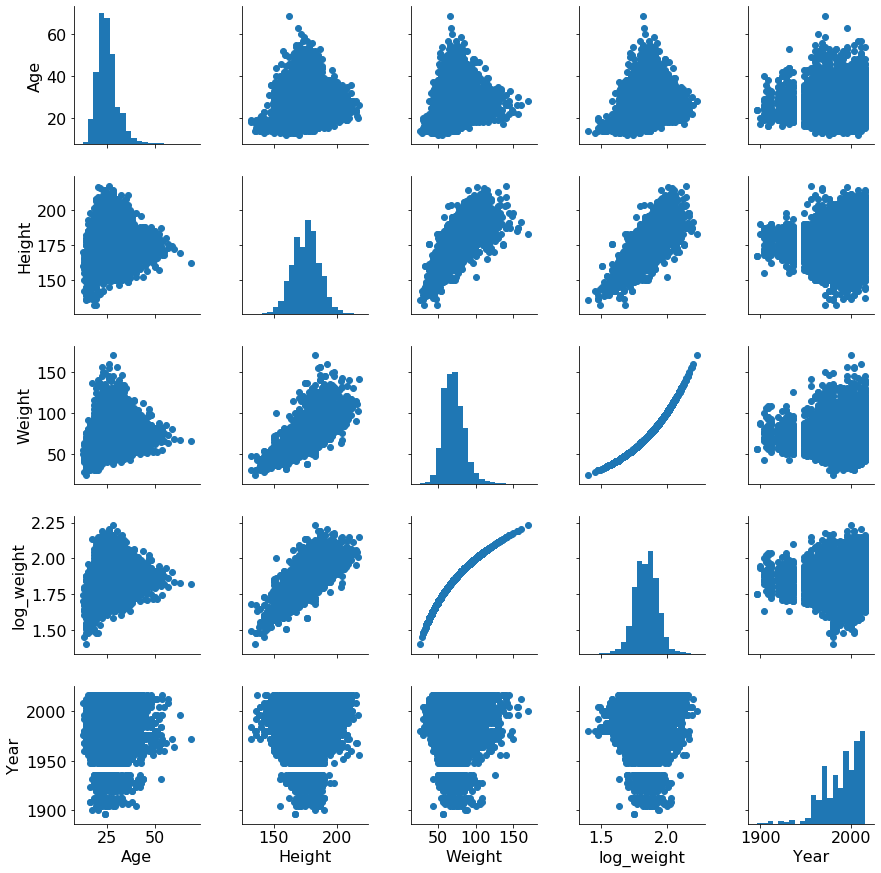

In [118]:
# plot matrix: sample 2000 (around 10% of total) data points so that plots are clearer and
# they render faster
samples = np.random.choice(olympics_numerical.shape[0], 20000, replace = False)
olympics_samp = olympics_numerical.loc[samples,:]

g = sns.PairGrid(data = olympics_samp, vars= numeric_vars_ext)
g = g.map_diag(plt.hist, bins = 20)
_ = g.map_offdiag(plt.scatter)

This reaffirms our previous transformation such using log for weight variable that illustrates to be part of a log-normal distribution. Height and weight (log-transformed) are positively correlated.
* An interesting aspect is that there seems to be more Athletes competing in the Olympics after the 1960s and by the 2000s as shown by the year histogram.

Do this similarly for the categorical variables using `pairplot`, which uses KDEs, scatter and regression plots for plot matrices

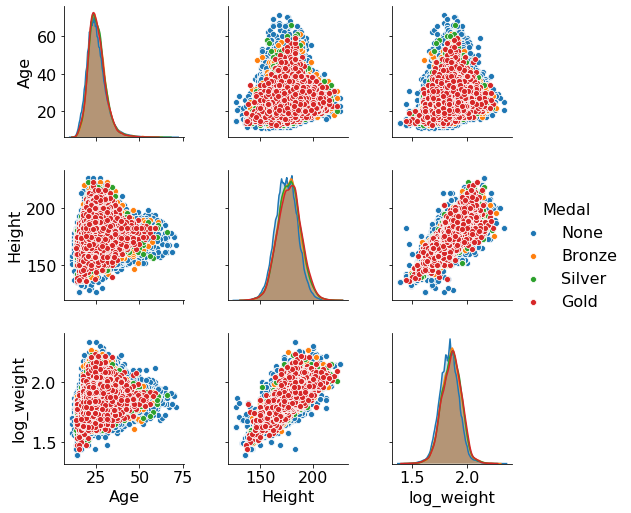

In [119]:
x = ['Age', 'Height', 'log_weight']
y = ['Age', 'Height', 'log_weight']
g = sns.pairplot(data= olympics_numerical, kind='scatter', hue='Medal',
                x_vars= x, y_vars= y)

Looking at Height and Weight (log transformed), medalists tend to have a close range of data points, whereas most of the varied data points tend to come from standard competitors. This also explain how there are slight differences for the mean (Average) group/bins of the personal attributes for medalists and non-medalists.
* Age - medal categories and standard competitors have a similar unimodal distribution
* Height - Medal winners have a close enough unimodal distribution, while standard competitors have have a trimodal and more varied Height distribution as hinted earlier
* Weight - Medals winners have a similar unimodal distribution, while standard competitors seem to have a tri/multi-modal distribution.

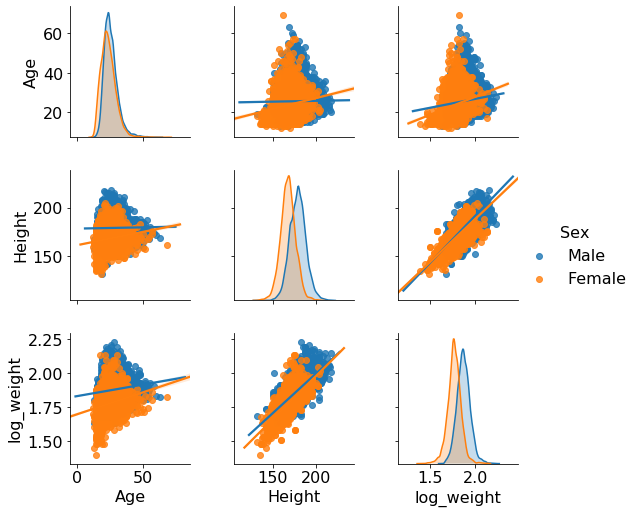

In [120]:
# regplots are intensive, so use the sample for general comparisons
x = ['Age', 'Height', 'log_weight']
y = ['Age', 'Height', 'log_weight']
g = sns.pairplot(data= olympics_samp, kind='reg', hue='Sex', hue_order=['Male','Female'],
                x_vars= x, y_vars= y)

Building on the positive correlation of Height and Weight, I have digged further to discern among Male and Female Athletes. For each personal attribute, there are unimodal distributions for each Sex, but nevertheless differences, mainly due to a larger sample size of Male Athletes relative to Female Athletes.

* Age - tends to be a higher density of Male Athletes that are older than Females centered around the mid 20-30 range as earlier conveyed.
* Height - tends to be at a greater density for Male Athletes at larger heights than for Females, while also more data points/variation at the upper end of the height scale for the former than for the latter.
* Weight - tends to be at a greater density for Male Athletes at larger weights than for Females, while also more data points/variation at the upper end of the height scale for the former than for the latter.

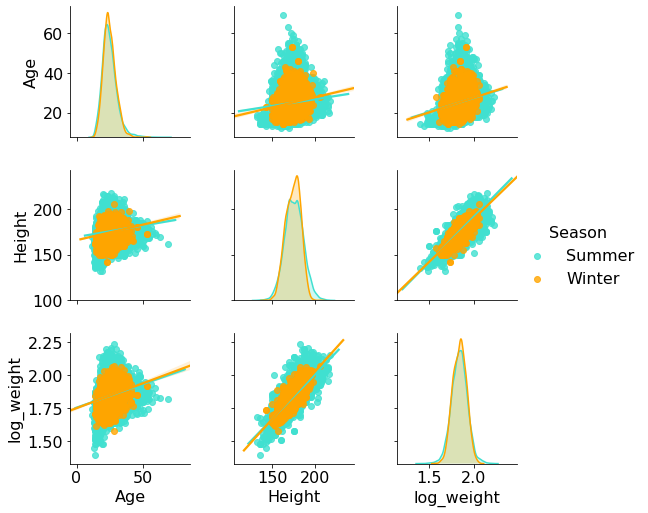

In [121]:
x = ['Age', 'Height', 'log_weight']
y = ['Age', 'Height', 'log_weight']

palette = {"Summer":'turquoise',"Winter":'orange'}
g = sns.pairplot(data= olympics_samp, kind='reg', hue='Season',
                x_vars= x, y_vars= y, palette= palette)

The last categorical variable I want to compare of athletes between their personal attributes are those competing in the Summer and Winter seasons. Based on either Season, personal attributes of Athletes all exhibit a unimodal distribution. Differences exist given the sample size for Athletes competing in Summer events is larger than it is those competing during Winter.

* Age - similar peak and little difference between the overlap of the two distributions, while also considering more variation for those competing in Summer events.
* Height - The peak Height bin between Athletes competing in Summer and Winter events is centered at around the same point, though there are more of those Athletes in that group for Winter than summer events, while considering the variation of Athletes that (competing in Summer) have both higher and lower than average Height relative to the Winter edition.
* Weight - The peak Weight bin between Athletes competing in Summer and Winter events is centered at around the same point, though there are slightly more of those Athletes in that group for Winter than summer events, while considering the variation of Athletes that (competing in Summer) have both higher and lower than average Height relative to the Winter edition.

***

Use `sns.distplot` and `FacetGrid` to plot various distributions of personal attributes among medalists

In [ ]:
ticks = np.arange(25, 214+10, 10)
age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50,55, 60, 65,70, 75]
g1 = sns.FacetGrid(data= olympics_numerical, hue='Medal', height=7, aspect=0.8, col='Medal')
g1.map(sns.distplot, 'Age')
g1.set(xticks= age_bins, xticklabels= age_bins)
g2 = sns.FacetGrid(data= olympics_numerical, hue='Medal', height=5, aspect=0.8, col='Medal')
g2.map(sns.distplot, 'Height')
g3 = sns.FacetGrid(data= olympics_numerical, hue='Medal', height=9, aspect=0.9, col='Medal')
g3.map(sns.distplot, 'Weight')
[plt.setp(ax.get_xticklabels(), rotation= 90) for ax in g3.axes.flat] # list comprehension to rotate x-ticks marks
g3.set(xscale= 'log')
g3.set(xticks = ticks, xticklabels= ticks)

Again, this is similar to the above histograms I filterd in the unimodal exploration, although its worth to reiterate the partial differences side-by-side for personal attributes among standard competitors (None) and medalists:
* **Age** - The Age of standard competitors have a multimodal distribution for Athletes centered at around 22 given  a sizeable range of frequencies between 20-25, with a sizeable bin also appearing between 29-30 as well. For each medalist category, the distributions are unimodal, again with a sizeable range of frequences between 20-25 and generally centered around 23-24 which is slightly higher than standard competitors, but for Silver medalists, there also appears to be a sizeable bin appearing between 29-30.
* **Height** - The Height of standard competitors also illustrates a multimodal distribution for Athletes centered at around 170 cm given  a sizeable range of frequencies between 165-180 cm. For each medalist category, the Height distributions are unimodal, with a sizeable range of frequencies between 165-180 cm. For Bronze and Silver, Height is centered around 175 cm, whereas for Gold medalists, Height is centered slightly higher being closer to around the 178-180 cm range, given a few more bins around/above this region.
* **Weight** - Finally, the Weight of standard competitors also illustrates a multimodal distribution for Athletes centered at around 65-68 kg, given a sizeable range of frequencies between 60-70 kg. For each medalist category, the Weight distribution are unimodal. The Bronze and Silver medalists' Weight are centered similarly to the standard competitors, given similar range of frequencies. The Gold medalists Weight tend to be centered slightly heigher being closer to the 70 kg point, given a few more bins around/above this region.

Use `lmplot` to compare Height (cm) and Weight (kg) for each sex

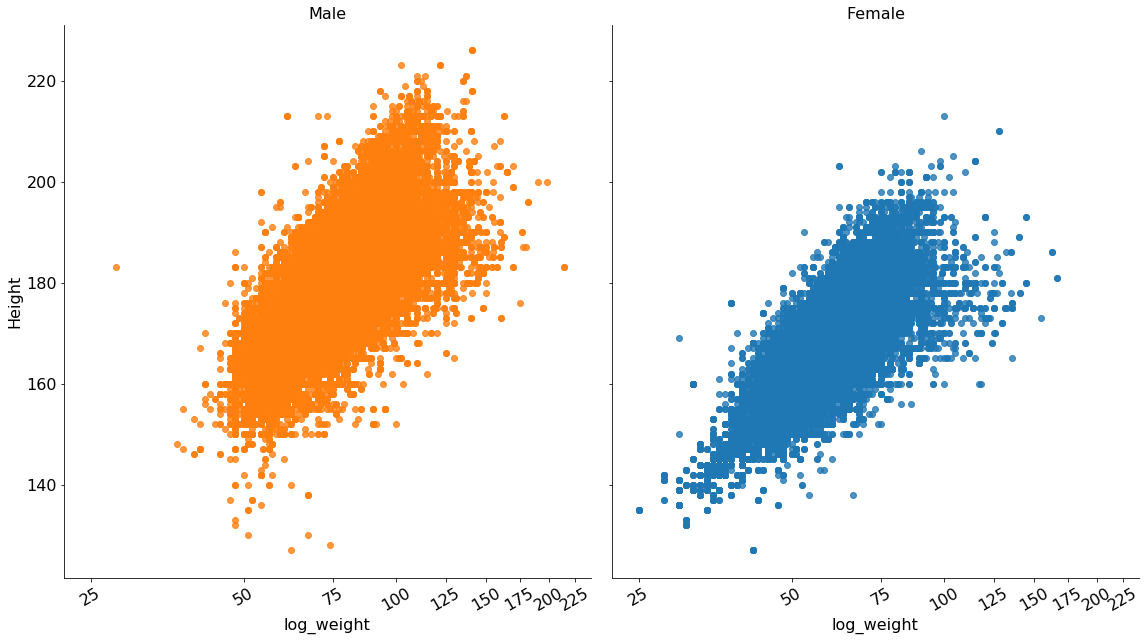

In [125]:
g = sns.lmplot(y='Height', x='log_weight', hue='Sex', col='Sex', data=olympics_numerical, height= 9, aspect=0.9, col_order=['Male','Female'], fit_reg= False
              , legend= False)
tick_locs = np.arange(25, 214+25, 25)
[plt.setp(ax.get_xticklabels(), rotation= 30) for ax in g.axes.flat] # list comprehension to rotate x-ticks marks
plt.xticks(log_trans(tick_locs), tick_locs)
g.set_titles("{col_name}")
plt.show();

Defining Weight and Height by Sex illustrates that Males tend to have more upper boundary outliers - observations of Athletes weighing closer to 200 kg, while also being taller at least by the 200 cm mark.

Female Athletes on the other hand tend to have more lower boundary outliers, with Athletes exhibiting Weight closer to 25-30 kg, while also being shorter closer to the 140 cm mark. 

Use `Catplot` to compare categorical variables across a subset

I would like to uncover the average (median) values of Male and Female Athletes based on their three personal attributes: Weight (kg), Height (cm) and Age. 
* The `pointplot` can estimate these relationships based on the average and uncertainty (variance) of these datapoints 

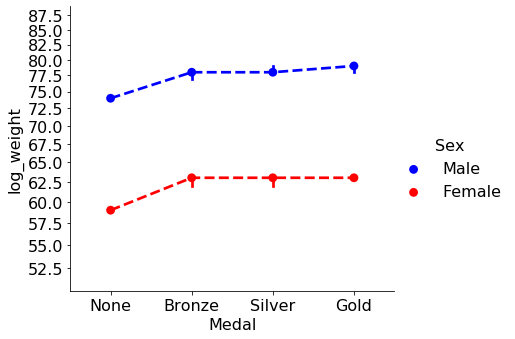

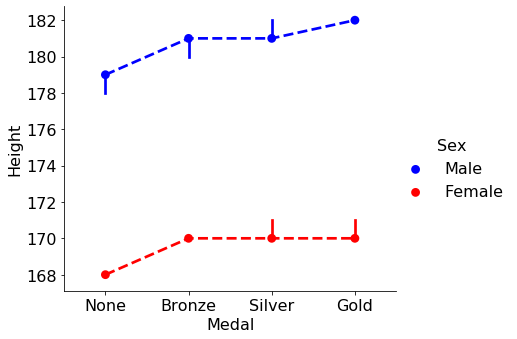

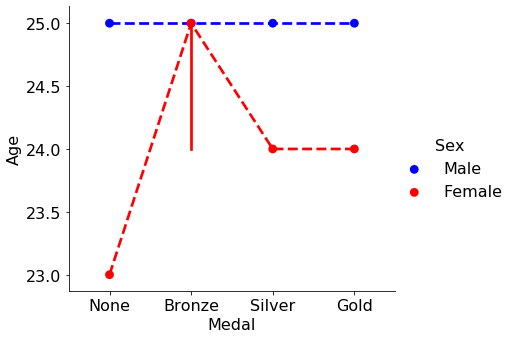

In [126]:
# Take the median as an estimator - 
# as the data for personal features have slightly skewed distributions in few cases
from numpy import median

plt.subplot(3,1,1)
sns.catplot(data= olympics_numerical, x='Medal', y='log_weight', kind='point', aspect=1.2, height=5
           , palette= sns.color_palette(['blue', 'red']), hue='Sex', hue_order=['Male','Female'], linestyles='--' 
           , estimator= np.median)
tick_locs = np.arange(25, 214+2.5, 2.5)
plt.yticks(log_trans(tick_locs), tick_locs)
plt.ylim((1.7,1.95))
# plt.text(2, 1.95, 'Personal Attributes (Mean) of Athletes: Male and Female')
plt.close(1)
plt.show()

# Use colorblind and markers for presentation
plt.subplot(3,1,2)
sns.catplot(data= olympics_numerical, x='Medal', y='Height', kind='point', aspect=1.2, height=5
           , palette= sns.color_palette(['blue', 'red']), hue='Sex', hue_order=['Male','Female'], linestyles='--'
           , estimator= np.median)
plt.close(1)
plt.show()

plt.subplot(3,1,3)
sns.catplot(data= olympics_numerical, x='Medal', y='Age', kind='point', aspect=1.2, height=5
           , palette= sns.color_palette(['blue', 'red']), hue='Sex', hue_order=['Male','Female'], linestyles='--'
           , estimator= np.median)
plt.close(1)
plt.show()

**Weight** - On Average, Male Athletes tend to hold more Weight than their Female counterparts. 
* For both Male and Female Athletes, standard competitors (None) are lighter than medalists at around 75 kg (Male) and 59 kg (Female); compared with Bronze and Silver medalists, athletes weigh around 78 kg, while Gold medalists tend to weigh around 80 kg (Males), whereas Female athletes weigh around 63-64 kg in each medal category on average.

**Height** - On Average, Male Athletes tend to taller than their Female counterparts.
* For both Male and Female Athletes, standard competitors are shorter than medalists at around 179 cm (Male) and 168 cm (Female); compared with Bronze and Silver medalists, athletes possess a Height of around 181 cm, while Gold medalists tend to be at a Height of around 182 cm (Males), whereas Female Athletes tend to have possess a Height of 170 cm in each medal category on average

**Age** - On Average, Male Athletes (except for Bronze medalists) tend to be *slightly* older than their Female counterparts.
* For Male athletes, be it standard competitors or medalists, on average, their ages are the same at 25 years, with little sign of uncertainty (variance) about the data-points in this region.
* However, there are differences between the Age of Female standard competitors and medalists. Standard Female competitors tended to be the youngest group at 23 years, while Female Bronze medalists tend to be the oldest group at 25 years - albeit with wide lower uncertainty of data-points between 24-25 years. Silver and Gold Female medalists tend to be grouped under the 24 years on average.

Use `plt.scatter` with c arg to compare age for Weight and Height - colorbar should be age.

* Given the strong positive correlation between Weight and Height, it would be interesting to see how the Ages vary.

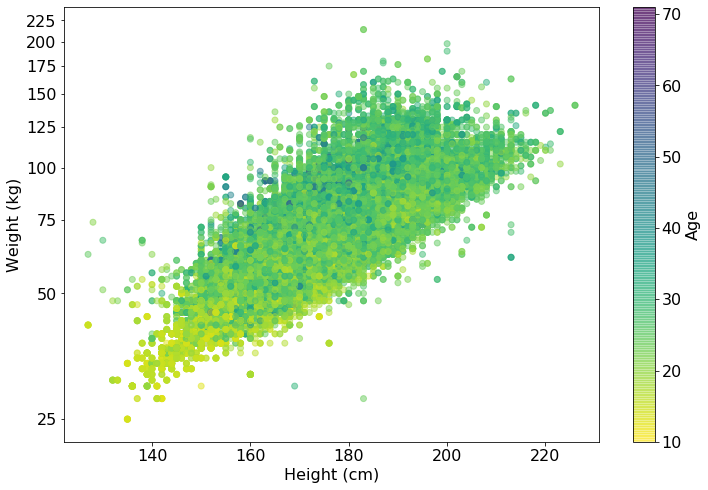

In [127]:
plt.figure(figsize=[12,8])
plt.scatter(data= olympics_numerical, y='log_weight', x='Height', c='Age', cmap='viridis_r', alpha=0.5)
tick_locs = np.arange(25, 214+25, 25)
plt.yticks(log_trans(tick_locs), tick_locs)
plt.ylabel('Weight (kg)')
plt.xlabel('Height (cm)')
plt.colorbar(label='Age')
plt.clim(10,71);

There is no significant discernible insight to suggest a predictable relationship given the amount of variability across these personal attribute variables. The only noticeable trend for athletes regarding weight and height attributes relative to age is in the lower end of height and weight numbers, as athletes tend to be younger, given an age range of teens or lower (<20). It may be inferred from the fitted regression plot earlier showing height and weight based on Sex that most of these athletes in this cluster *tend* to be female.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Elaborating from the earlier histograms in the Univariate Exploration, I used FacetGrids - utilising `distplot` to interpret the distributions under **KDEs** - which deepened my understanding of athlete personal attribute statistics (Age, Height and Weight) by medal categories side-by-side, making it easier to discern the disparities among medalists and standard competitors ('None' medalists). Maintaining the regions where most athletes are grouped/binned among the densities for each personal attribute, it's noticeable that standard competitors illustrated the most variation, given multimodal distributions - perhaps given the sample size is much larger as confirmed earlier by the scatter plots via `pairplot`.

When granulating the median personal attributes further among medalists (with standard competitors) by Sex, it confirms that Males tend to be heavier, taller (also given the earlier `lmplot` where there tended to be Females at the lower end of Height and Weight observations) and *slightly* older than their Female counterparts.

### Were there any interesting or surprising interactions between features?

Given that Height and Weight of athletes exhibit a positive correlation, I utilised a `scatter` plot to see how Age varies concerning these two variables. Given much variability, it turns out that the only interesting interaction of Age between Height and Weight is that athletes who are are aged less than 20 years are mostly grouped in the lower range of Height and Weight, i.e. less than 150 cm and 40 kg.